# Auditory Perceptual Framing Analysis Script (2021). Pitch discrimination task.Generate Choice file for all participants (pet experiment)


# Load data participants


In [26]:
# Select participants

select_subj = range(1,45) # participants pilot1-3 are excluded because they are actual pilots


choiceNameFrames = list()

for i in np.arange(len(select_subj)):
    choiceNameFrames1 = glob.glob('/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot'+str(select_subj[i])+'/RESULTS_FILE.txt')
    
    choiceNameFrames1.sort()
    
    choiceNameFrames.extend(choiceNameFrames1)


In [27]:
choiceNameFrames

['/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot4/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot5/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot6/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot7/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot8/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot9/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot10/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot11/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot12/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot13/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot14/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot15/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB202

## Join dataframes 

In [28]:
partic_num=len(choiceNameFrames) #number of participants

rateFrameRawAll = pd.DataFrame( )
choiceFrameAll = pd.DataFrame( )

for j in range (partic_num):
    choiceFrames = pd.read_csv(choiceNameFrames[j],delim_whitespace=True) 

    # add participant name column
    partNamesChoice = [int(j)]*len(choiceFrames)
    #sessionChoice = [int(os.path.basename(rateNameFrames[j])[-5])]*len(choiceFrames)

    choiceFrames['part'] = partNamesChoice 
    
    choiceFrameAll = pd.concat([choiceFrameAll,choiceFrames],ignore_index=True)


In [29]:
choiceNameFrames

['/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot4/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot5/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot6/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot7/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot8/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot9/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot10/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot11/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot12/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot13/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot14/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot15/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB202

## Normalize (z-score) values

In [30]:
choiceFrameAll["logRT"] = np.log(choiceFrameAll["Choice_SND1_RT"])


choiceFrameAll["zRT"] = z_score1(choiceFrameAll,'part',"Choice_SND1_RT")
choiceFrameAll["zLogRT"] = z_score1(choiceFrameAll,'part',"logRT")


choiceFrameAll["zConf"] = z_score1(choiceFrameAll,'part',"CONF")

choiceFrameAll["zLFreq"] = z_score1(choiceFrameAll,'part',"freql")
choiceFrameAll["zRFreq"] = z_score1(choiceFrameAll,'part',"freqr")

choiceFrameAll["Choice"] = (choiceFrameAll['Choice_SND1'] == 'm')*1 + (choiceFrameAll['Choice_SND1'] == 'z')*0

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Include new variables

In [31]:
choiceFrameAll["totFreq"] = choiceFrameAll['freql'] + choiceFrameAll['freqr'] 
choiceFrameAll["dFreq"] =  - choiceFrameAll['freql'] +  choiceFrameAll['freqr'] 
choiceFrameAll["absDFreq"] =  np.abs(- choiceFrameAll['freql'] +  choiceFrameAll['freqr'] )

choiceFrameAll["zTotFreq"] = z_score1(choiceFrameAll,'part',"totFreq")
choiceFrameAll["zDFreq"] = z_score1(choiceFrameAll,'part',"dFreq")
choiceFrameAll["zAbsDFreq"] = z_score1(choiceFrameAll,'part',"absDFreq")


choiceFrameAll["choFreq"] =  ((choiceFrameAll["Choice"] == 0) * choiceFrameAll['freql']) +  ((choiceFrameAll["Choice"] == 1) *choiceFrameAll['freqr'] )
choiceFrameAll["unchoFreq"] =  ((choiceFrameAll["Choice"] == 1) * choiceFrameAll['freql']) +  ((choiceFrameAll["Choice"] == 0) *choiceFrameAll['freqr'] )

choiceFrameAll["zChoFreq"] = z_score1(choiceFrameAll,'part',"choFreq")
choiceFrameAll["zUnchoFreq"] = z_score1(choiceFrameAll,'part',"unchoFreq")

In [32]:
choiceFrameAll.columns

Index(['Session_Name_', 'Trial_Index_', 'expcond', 'trialn', 'noisecond',
       'whichfirstopt', 'noiseinl', 'noiseinr', 'freql', 'freqr', 'frame',
       'Frame_Name', 'Slider_X', 'Choice_SND1_Time', 'CONF', 'CONF_RT',
       'Choice_SND1', 'Choice_SND1_RT', 'TRIAL_N_LIVE', 'expcond_1',
       'trialn_1', 'noisecond_1', 'whichfirstopt_1', 'noiseinl_1',
       'noiseinr_1', 'freql_1', 'freqr_1', 'frame_1', 'itm_1', 'itm', 'part',
       'key_pract', 'logRT', 'zRT', 'zLogRT', 'zConf', 'zLFreq', 'zRFreq',
       'Choice', 'totFreq', 'dFreq', 'absDFreq', 'zTotFreq', 'zDFreq',
       'zAbsDFreq', 'choFreq', 'unchoFreq', 'zChoFreq', 'zUnchoFreq'],
      dtype='object')

In [33]:
data_splits = splitBy(choiceFrameAll, Splits_headers = ['ConfSplit'],Splits_variables = ['zConf'])
choiceFrameAll['ConfSplit'] = data_splits['ConfSplit'].values

In [34]:
choiceFrameAll

Session_Name_  Trial_Index_     expcond  trialn  noisecond  \
0           Pilot4            21  Experiment     170          1   
1           Pilot4            22  Experiment     128          1   
2           Pilot4            23  Experiment      94          1   
3           Pilot4            24  Experiment     145          1   
4           Pilot4            25  Experiment     120          1   
...            ...           ...         ...     ...        ...   
6833       Pilot41           196  Experiment      72          1   
6834       Pilot41           197  Experiment       2          1   
6835       Pilot41           198  Experiment      35          1   
6836       Pilot41           199  Experiment      25          1   
6837       Pilot41           200  Experiment      53          1   

      whichfirstopt  noiseinl  noiseinr  freql  freqr  ...  dFreq absDFreq  \
0                 0         1         1      9      8  ...     -1        1   
1                 0         1         1      5      2  ...     -3        3   
2                 0         1         1      1      5  ...      4        4   
3                 0         1         1      7      1  ...     -6        6   
4                 0         1         1      4      3  ...     -1        1   
...             ...       ...       ...    ...    ...  ...    ...      ...   
6833              0         1         1      8     10  ...      2        2   
6834              0         1         1      1      3  ...      2        2   
6835              0         1         1      4      9  ...      5        5   
6836              0         1         1      3      8  ...      5        5   
6837              0         1         1      6      9  ...      3        3   

      zTotFreq    zDFreq  zAbsDFreq  choFreq unchoFreq  zChoFreq  zUnchoFreq  \
0     1.566699 -0.233550  -1.206045        9         8  1.275618    0.817832   
1    -1.044466 -0.700649  -0.301511        2         5 -1.174502   -0.223747   
2    -1.305582  0.934199   0.150756        1         5 -1.524519   -0.223747   
3    -0.783349 -1.401298   1.055290        1         7 -1.524519    0.470639   
4    -1.044466 -0.233550  -1.206045        3         4 -0.824485   -0.570939   
...        ...       ...        ...      ...       ...       ...         ...   
6833  1.821623  0.460526  -0.748133        8        10  0.760201    1.705992   
6834 -1.824533  0.460526  -0.748133        3         1 -0.957931   -1.504701   
6835  0.519425  1.163091   0.609122        9         4  1.103828   -0.434470   
6836 -0.001455  1.163091   0.609122        8         3  0.760201   -0.791214   
6837  1.040304  0.694714  -0.295715        9         6  1.103828    0.279017   

     ConfSplit  
0          0.0  
1          1.0  
2          1.0  
3          1.0  
4          0.0  
...        ...  
6833       0.0  
6834       0.0  
6835       1.0  
6836       1.0  
6837       1.0  

[6838 rows x 50 columns]

In [35]:
choiceFrameAll.columns

Index(['Session_Name_', 'Trial_Index_', 'expcond', 'trialn', 'noisecond',
       'whichfirstopt', 'noiseinl', 'noiseinr', 'freql', 'freqr', 'frame',
       'Frame_Name', 'Slider_X', 'Choice_SND1_Time', 'CONF', 'CONF_RT',
       'Choice_SND1', 'Choice_SND1_RT', 'TRIAL_N_LIVE', 'expcond_1',
       'trialn_1', 'noisecond_1', 'whichfirstopt_1', 'noiseinl_1',
       'noiseinr_1', 'freql_1', 'freqr_1', 'frame_1', 'itm_1', 'itm', 'part',
       'key_pract', 'logRT', 'zRT', 'zLogRT', 'zConf', 'zLFreq', 'zRFreq',
       'Choice', 'totFreq', 'dFreq', 'absDFreq', 'zTotFreq', 'zDFreq',
       'zAbsDFreq', 'choFreq', 'unchoFreq', 'zChoFreq', 'zUnchoFreq',
       'ConfSplit'],
      dtype='object')

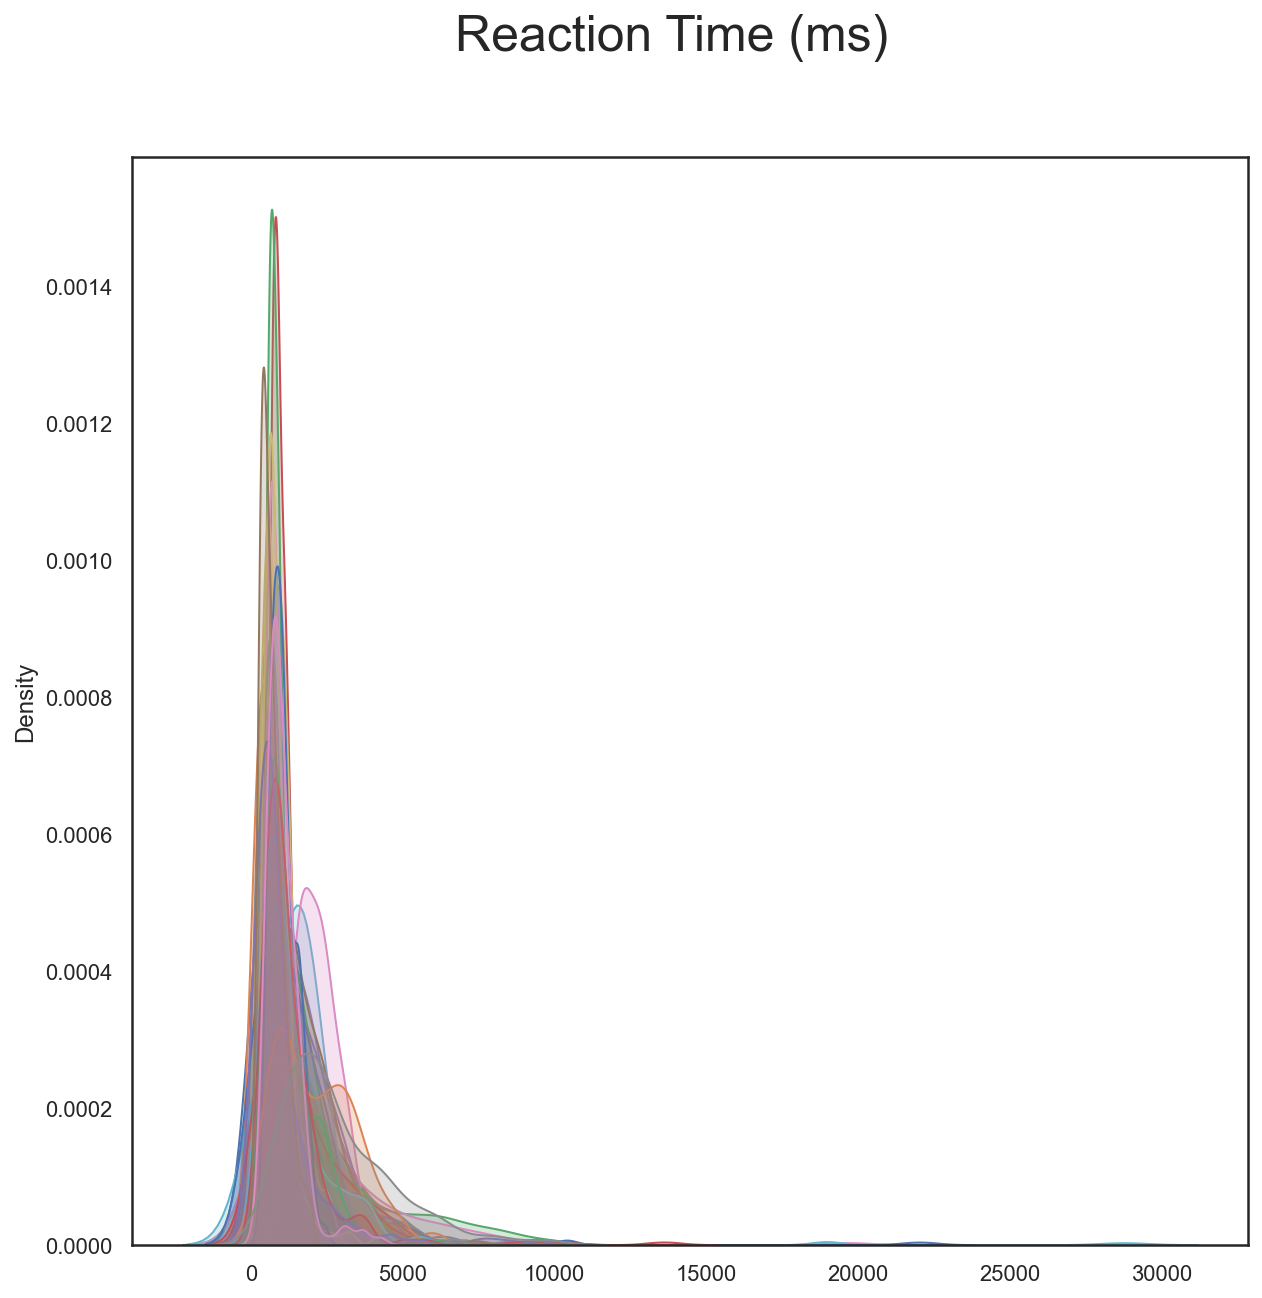

In [36]:
participant_densities(choiceFrameAll,'Choice_SND1_RT', title = 'Reaction Time (ms)')

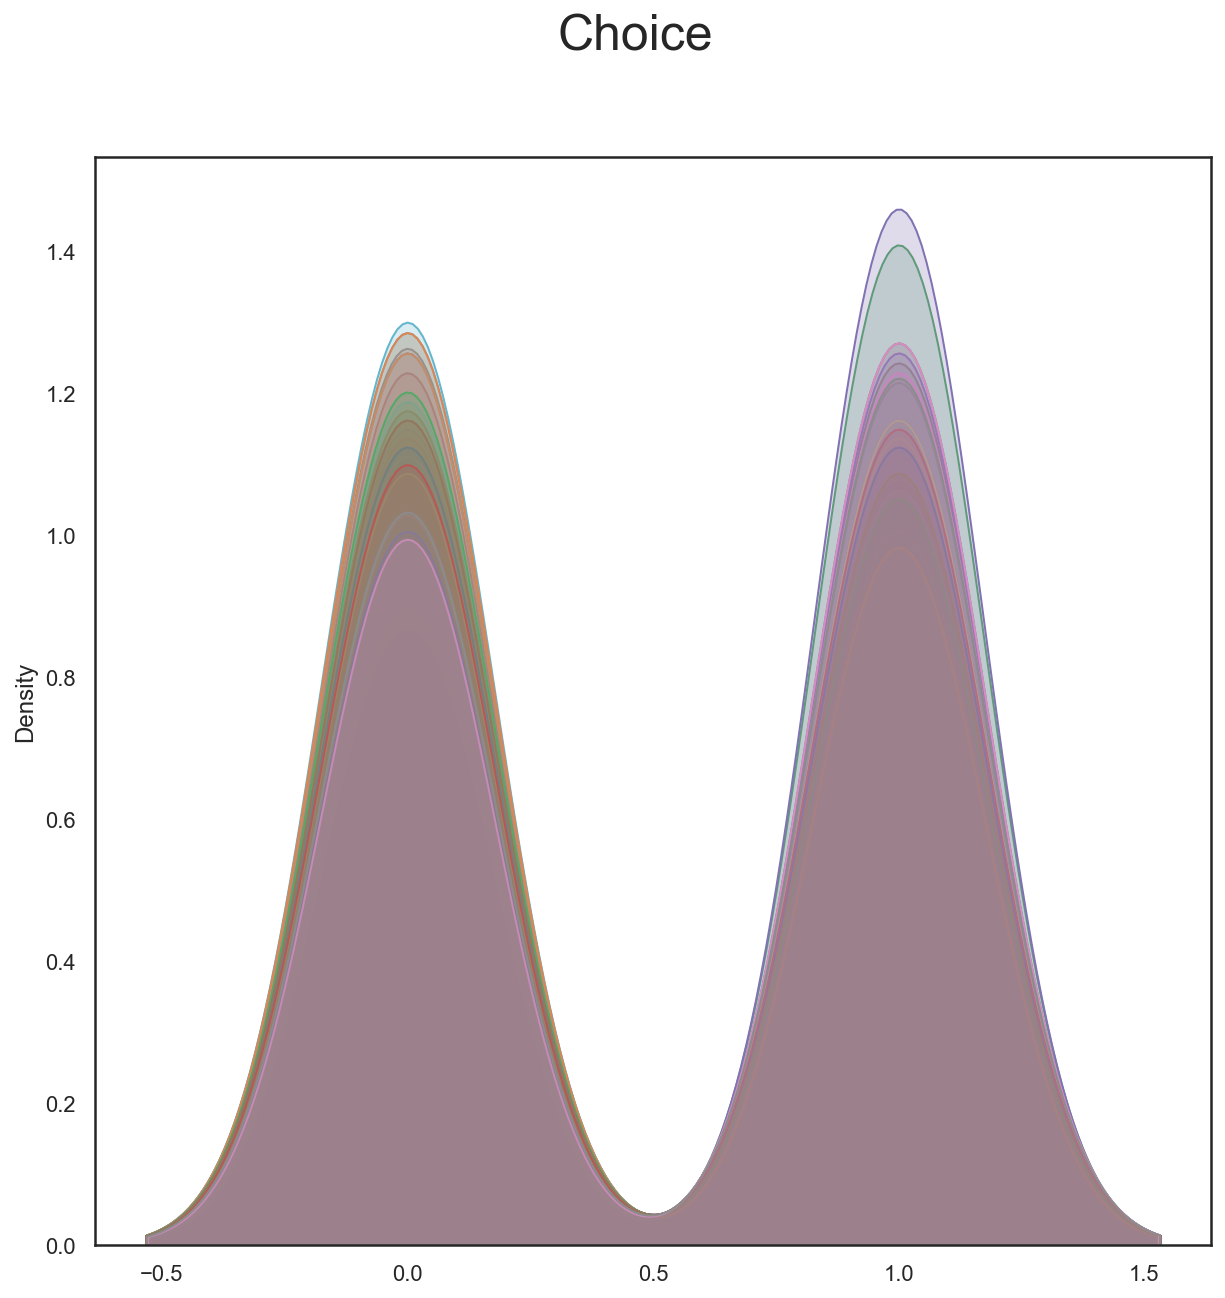

In [37]:
participant_densities(choiceFrameAll,'Choice', title = 'Choice')

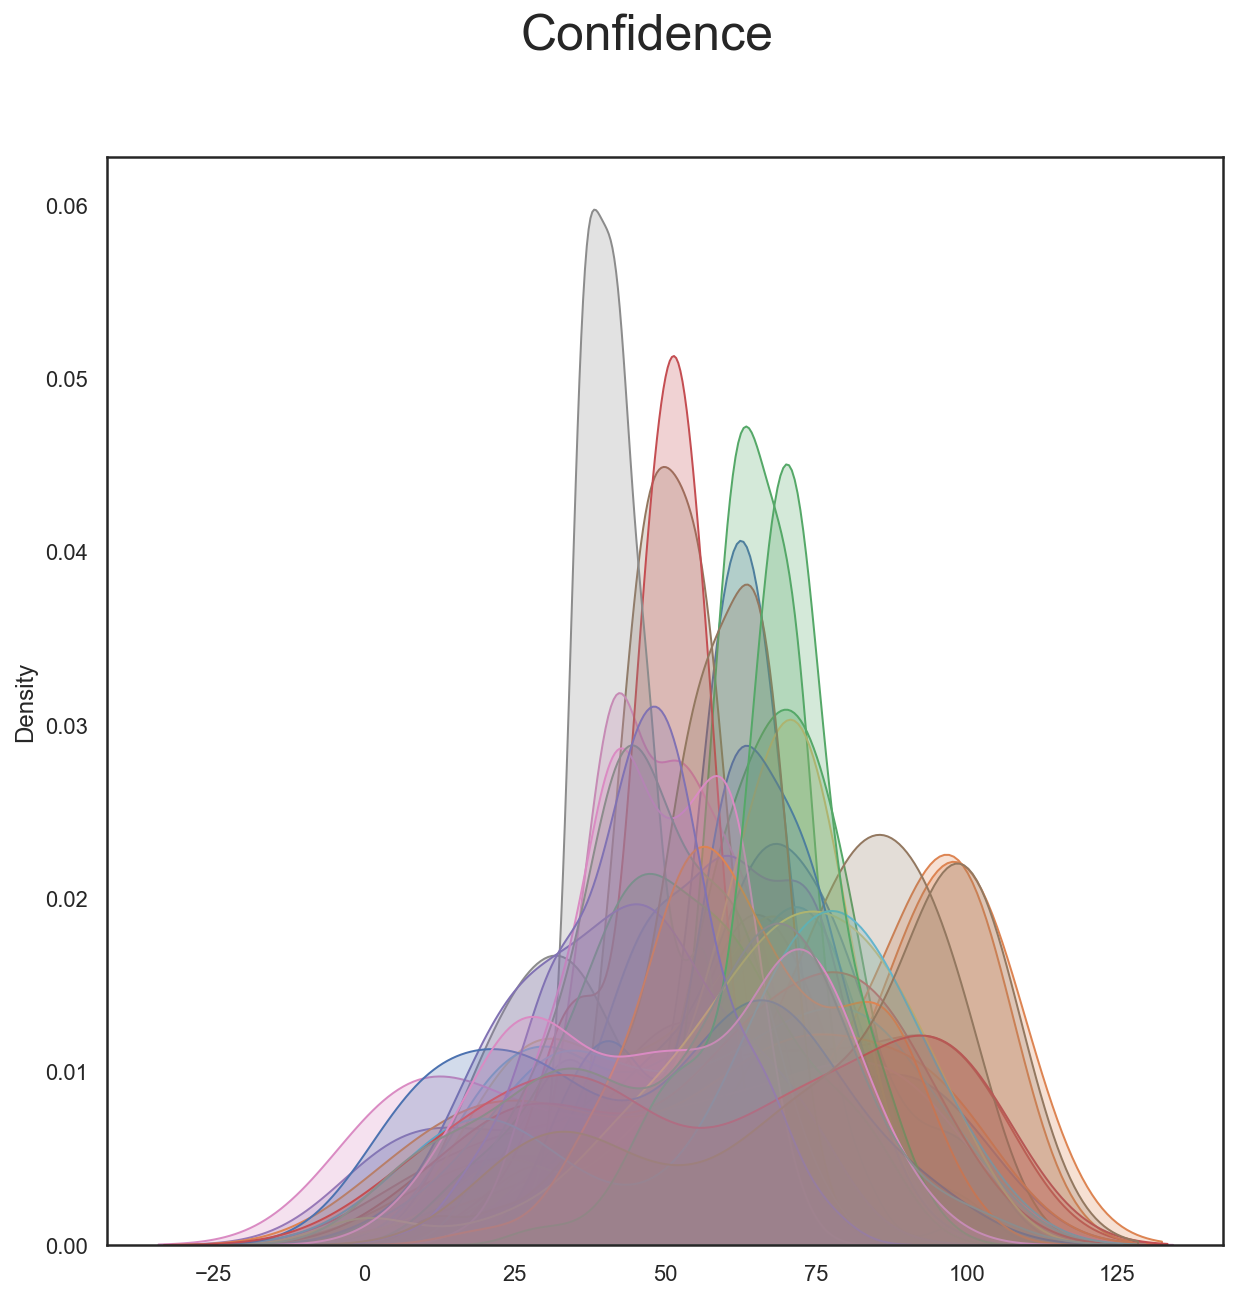

In [38]:
participant_densities(choiceFrameAll,'CONF', title = 'Confidence')

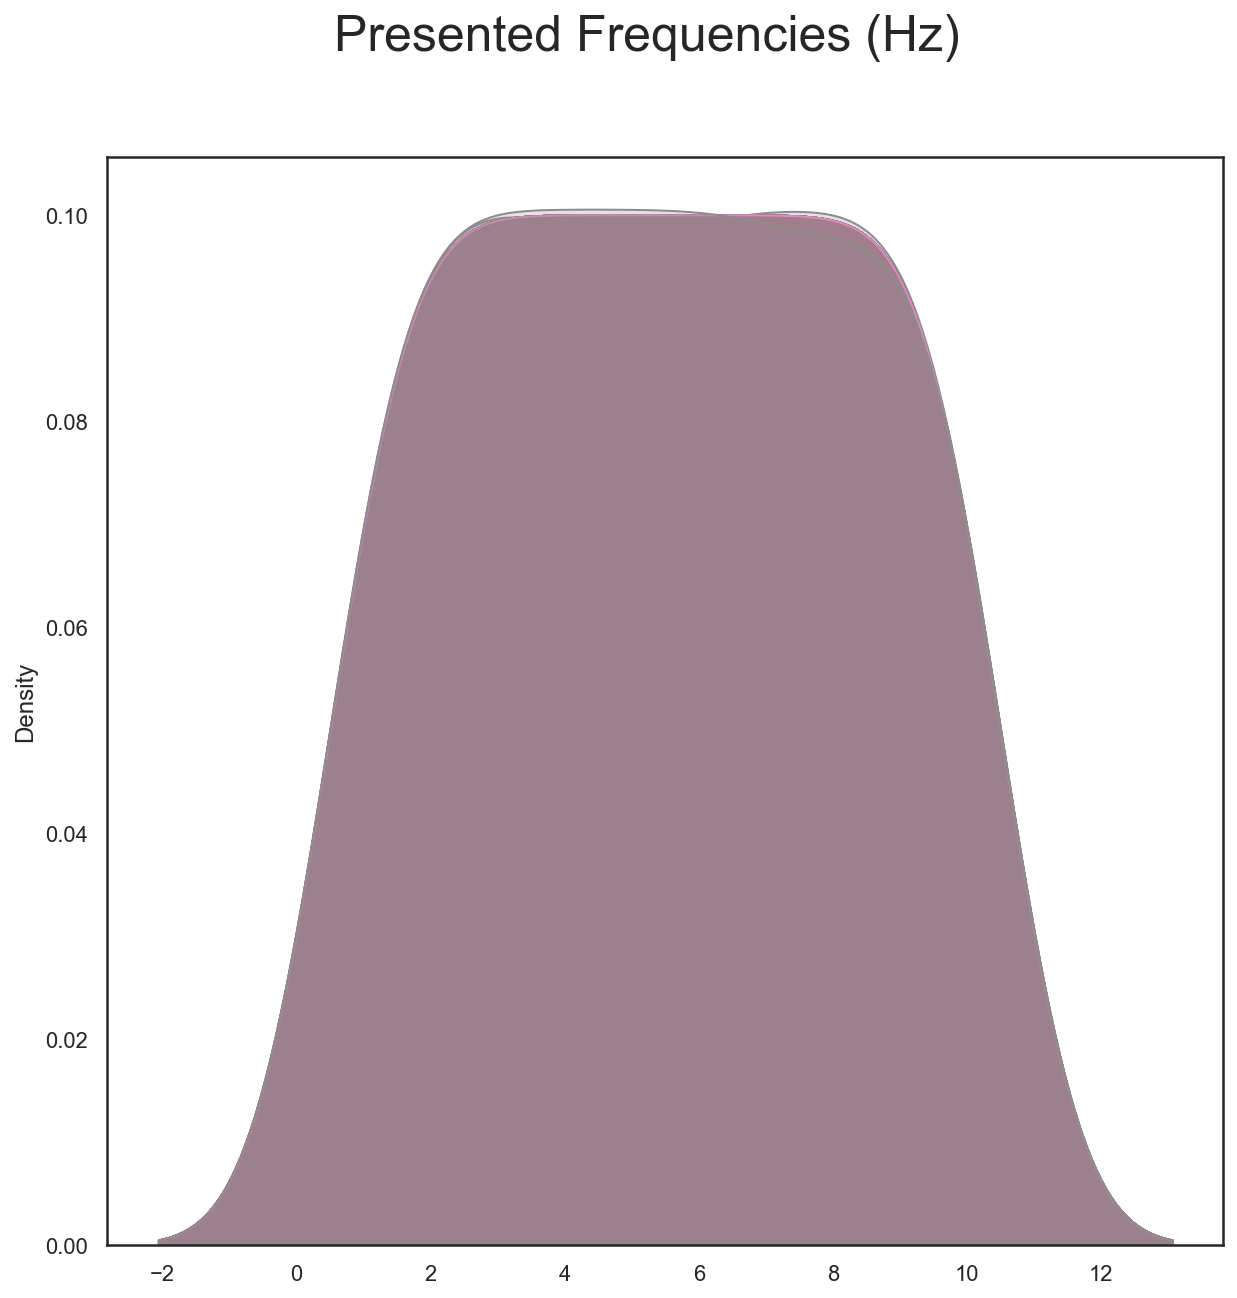

In [39]:
participant_densities(choiceFrameAll,'freql', title = 'Presented Frequencies (Hz)')

## Check confidence range

No rejections by confidence

In [93]:
ExclusionMatrix = []
#for cycle for participant
for k in choiceFrameAll['part'].unique():
 
    # Checking for confidence
    participant_data = choiceFrameAll.loc[ (choiceFrameAll['part'] == k)]
    
    participant_name = np.unique(participant_data.Session_Name_)
    ConfidencePart =   participant_data ['CONF']
    
    ConfRange = max(ConfidencePart) - min(ConfidencePart)
    ConfCounts = ConfidencePart.value_counts()
    
    maxConfCounts = max(ConfCounts)
    ConfCountsTotal = sum(int(i) for i in ConfCounts.values)
    
    PropnMostFreqConf = maxConfCounts / ConfCountsTotal
    PropnRangeConf = ConfRange / 100

    
    if PropnMostFreqConf>.5:
        textProp = '*'
    else:
        textProp = 'ok'

    if PropnRangeConf<.25:
        textRange = '*'
    else:
        textRange = 'ok'
        
    
    ExclusionMatrix.append([k , participant_name, PropnMostFreqConf,textProp, PropnRangeConf,textRange]) 


ExclusionMatrix=pd.DataFrame(ExclusionMatrix,columns=['Participant','PartName','ProportionMostFrequentConfidence', '','ProportionRangeConfidence',''])

ExclusionMatrix

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarni

Participant   PartName  ProportionMostFrequentConfidence      \
0             0   [Pilot4]                          0.333333  ok   
1             1   [Pilot5]                          0.461111  ok   
2             2   [Pilot6]                          0.172222  ok   
3             3   [Pilot7]                          0.161111  ok   
4             4   [Pilot8]                          0.200000  ok   
5             5   [Pilot9]                          0.238889  ok   
6             6  [Pilot10]                          0.216667  ok   
7             7  [Pilot11]                          0.127778  ok   
8             8  [Pilot12]                          0.166667  ok   
9             9  [Pilot13]                          0.122222  ok   
10           10  [Pilot14]                          0.172222  ok   
11           11  [Pilot15]                          0.372222  ok   
12           12  [Pilot16]                          0.283333  ok   
13           13  [Pilot17]                          0.300000  ok   
14           14  [Pilot18]                          0.161111  ok   
15           15  [Pilot19]                          0.144444  ok   
16           16  [Pilot20]                          0.077778  ok   
17           17  [Pilot21]                          0.318436  ok   
18           18  [Pilot22]                          0.250000  ok   
19           19  [Pilot23]                          0.116667  ok   
20           20  [Pilot24]                          0.233333  ok   
21           21  [Pilot25]                          0.088889  ok   
22           22  [Pilot26]                          0.138889  ok   
23           23  [Pilot27]                          0.100000  ok   
24           24  [Pilot28]                          0.111111  ok   
25           25  [Pilot29]                          0.261111  ok   
26           26  [Pilot30]                          0.183333  ok   
27           27  [Pilot31]                          0.172222  ok   
28           28  [Pilot32]                          0.122222  ok   
29           29    [P33x2]                          0.166667  ok   
30           30  [Pilot34]                          0.105556  ok   
31           31  [Pilot35]                          0.144444  ok   
32           32  [Pilot36]                          0.283333  ok   
33           33  [Pilot37]                          0.133333  ok   
34           34  [Pilot38]                          0.172222  ok   
35           35  [Pilot39]                          0.455556  ok   
36           36  [Pilot40]                          0.155556  ok   
37           37  [Pilot41]                          0.189944  ok   

    ProportionRangeConfidence      
0                      0.7667  ok  
1                      1.0000  ok  
2                      0.7833  ok  
3                      1.0000  ok  
4                      1.0000  ok  
5                      0.5500  ok  
6                      0.6500  ok  
7                      0.8000  ok  
8                      0.7500  ok  
9                      0.8000  ok  
10                     0.8333  ok  
11                     1.0000  ok  
12                     0.6833  ok  
13                     0.5000  ok  
14                     0.7500  ok  
15                     0.8333  ok  
16                     1.0000  ok  
17                     0.4500  ok  
18                     0.8667  ok  
19                     0.9833  ok  
20                     0.7500  ok  
21                     1.0000  ok  
22                     0.7500  ok  
23                     1.0000  ok  
24                     0.8667  ok  
25                     0.6500  ok  
26                     0.5500  ok  
27                     0.6000  ok  
28                     1.0000  ok  
29                     1.0000  ok  
30                     0.9500  ok  
31                     0.8333  ok  
32                     0.7000  ok  
33                     1.0000  ok  
34                     0.7000  ok  
35                     0.8333  ok  
36                 

ProportionMostFrequentConfidence : the proportion of all the confidence values that have been reported with a single (most frequent) value (0: no repetition, 1: all items received the same confidence value )  
ProportionRangeConfidence : proportion of the whole range that was covered by the confidence values (0: no range, 1: whole range covered)

## Exclusion criteria:
1. Participants used less than 25% of the choice confidence scales.  
2. Participants gave exactly the same confidence rating for more than 50% of their choices.


# Calculate the accuracy

In [48]:
Correct = []
for i in range(len(choiceFrameAll)):
    if choiceFrameAll.frame[i] == 1:
        if (choiceFrameAll.Choice[i] == 1 and (choiceFrameAll.zLFreq[i] <= choiceFrameAll.zRFreq[i])) or (choiceFrameAll.Choice[i] == 0 and (choiceFrameAll.zLFreq[i] >= choiceFrameAll.zRFreq[i])):
            Correct.append(1)
            
        else:
            Correct.append(0)
    if choiceFrameAll.frame[i] == 2:
        if (choiceFrameAll.Choice[i] == 0 and (choiceFrameAll.zLFreq[i] <= choiceFrameAll.zRFreq[i])) or (choiceFrameAll.Choice[i] == 1 and (choiceFrameAll.zLFreq[i] >= choiceFrameAll.zRFreq[i])):
            Correct.append(1)
        else:
            Correct.append(0)

choiceFrameAll["correct"] = Correct

In [49]:
#choiceFrameAll["correct_side"] = ((choiceFrameAll["frame"] == 1) * (choiceFrameAll.zLFreq <= choiceFrameAll.zRFreq)) + ((choiceFrameAll["frame"] == 2) * (choiceFrameAll.zLFreq >= choiceFrameAll.zRFreq))

In [50]:
choiceFrameAll

Session_Name_  Trial_Index_     expcond  trialn  noisecond  \
0           Pilot4            21  Experiment     170          1   
1           Pilot4            22  Experiment     128          1   
2           Pilot4            23  Experiment      94          1   
3           Pilot4            24  Experiment     145          1   
4           Pilot4            25  Experiment     120          1   
...            ...           ...         ...     ...        ...   
6833       Pilot41           196  Experiment      72          1   
6834       Pilot41           197  Experiment       2          1   
6835       Pilot41           198  Experiment      35          1   
6836       Pilot41           199  Experiment      25          1   
6837       Pilot41           200  Experiment      53          1   

      whichfirstopt  noiseinl  noiseinr  freql  freqr  ...  absDFreq  \
0                 0         1         1      9      8  ...         1   
1                 0         1         1      5      2  ...         3   
2                 0         1         1      1      5  ...         4   
3                 0         1         1      7      1  ...         6   
4                 0         1         1      4      3  ...         1   
...             ...       ...       ...    ...    ...  ...       ...   
6833              0         1         1      8     10  ...         2   
6834              0         1         1      1      3  ...         2   
6835              0         1         1      4      9  ...         5   
6836              0         1         1      3      8  ...         5   
6837              0         1         1      6      9  ...         3   

      zTotFreq    zDFreq  zAbsDFreq  choFreq  unchoFreq  zChoFreq  zUnchoFreq  \
0     1.566699 -0.233550  -1.206045        9          8  1.275618    0.817832   
1    -1.044466 -0.700649  -0.301511        2          5 -1.174502   -0.223747   
2    -1.305582  0.934199   0.150756        1          5 -1.524519   -0.223747   
3    -0.783349 -1.401298   1.055290        1          7 -1.524519    0.470639   
4    -1.044466 -0.233550  -1.206045        3          4 -0.824485   -0.570939   
...        ...       ...        ...      ...        ...       ...         ...   
6833  1.821623  0.460526  -0.748133        8         10  0.760201    1.705992   
6834 -1.824533  0.460526  -0.748133        3          1 -0.957931   -1.504701   
6835  0.519425  1.163091   0.609122        9          4  1.103828   -0.434470   
6836 -0.001455  1.163091   0.609122        8          3  0.760201   -0.791214   
6837  1.040304  0.694714  -0.295715        9          6  1.103828    0.279017   

      ConfSplit correct  
0           0.0       0  
1           1.0       1  
2           1.0       1  
3           1.0       1  
4           0.0       1  
...         ...     ...  
6833        0.0       0  
6834        0.0       1  
6835        1.0       1  
6836        1.0       1  
6837        1.0       1  

[6838 rows x 51 columns]

In [ ]:
#participant_densities(choiceFrameAll,'correct_side', title = 'Correct side')

# drop columns that generate problems

In [ ]:
choiceFrameAll = choiceFrameAll.drop(columns = ['expcond_1','trialn_1','noisecond_1','whichfirstopt_1','noiseinl_1','noiseinr_1','freql_1','freqr_1','frame_1','key_pract'])

In [112]:
choiceFrameAll

Session_Name_  Trial_Index_     expcond  trialn  noisecond  \
0           Pilot4            21  Experiment     170          1   
1           Pilot4            22  Experiment     128          1   
2           Pilot4            23  Experiment      94          1   
3           Pilot4            24  Experiment     145          1   
4           Pilot4            25  Experiment     120          1   
...            ...           ...         ...     ...        ...   
6833       Pilot41           196  Experiment      72          1   
6834       Pilot41           197  Experiment       2          1   
6835       Pilot41           198  Experiment      35          1   
6836       Pilot41           199  Experiment      25          1   
6837       Pilot41           200  Experiment      53          1   

      whichfirstopt  noiseinl  noiseinr  freql  freqr  ...    zDFreq  \
0                 0         1         1      9      8  ... -0.233550   
1                 0         1         1      5      2  ... -0.700649   
2                 0         1         1      1      5  ...  0.934199   
3                 0         1         1      7      1  ... -1.401298   
4                 0         1         1      4      3  ... -0.233550   
...             ...       ...       ...    ...    ...  ...       ...   
6833              0         1         1      8     10  ...  0.460526   
6834              0         1         1      1      3  ...  0.460526   
6835              0         1         1      4      9  ...  1.163091   
6836              0         1         1      3      8  ...  1.163091   
6837              0         1         1      6      9  ...  0.694714   

     zAbsDFreq  choFreq  unchoFreq  zChoFreq  zUnchoFreq ConfSplit  correct  \
0    -1.206045        9          8  1.275618    0.817832       0.0        0   
1    -0.301511        2          5 -1.174502   -0.223747       1.0        1   
2     0.150756        1          5 -1.524519   -0.223747       1.0        1   
3     1.055290        1          7 -1.524519    0.470639       1.0        1   
4    -1.206045        3          4 -0.824485   -0.570939       0.0        1   
...        ...      ...        ...       ...         ...       ...      ...   
6833 -0.748133        8         10  0.760201    1.705992       0.0        0   
6834 -0.748133        3          1 -0.957931   -1.504701       0.0        1   
6835  0.609122        9          4  1.103828   -0.434470       1.0        1   
6836  0.609122        8          3  0.760201   -0.791214       1.0        1   
6837 -0.295715        9          6  1.103828    0.279017       1.0        1   

      LEv_bin REv_bin  
0           4       3  
1           2       0  
2           0       1  
3           3       0  
4           1       0  
...       ...     ...  
6833        3       4  
6834        0       0  
6835        1       4  
6836        1       3  
6837        2       4  

[6838 rows x 43 columns]

# split the dataframe

In [55]:
data_expHigh = choiceFrameAll.loc[(choiceFrameAll['frame'] == 1)] # 1 = high, 2 = low
data_expLow = choiceFrameAll.loc[(choiceFrameAll['frame'] == 2)] # 1 = high, 2 = low

In [124]:
accuracies = pd.DataFrame( columns = [])
accuracyH = []
accuracyL = []
rejAccuracyH = []
rejAccuracyL = []
rejList = []
partName = []
reNameList = []

for i in choiceFrameAll.part.unique():
    accuracyH.append(choiceFrameAll.loc[(choiceFrameAll['frame'] == 1) & (choiceFrameAll['part'] == i)].correct.mean())
    
    partName.append(np.unique(choiceFrameAll.loc[(choiceFrameAll['frame'] == 1) & (choiceFrameAll['part'] == i)].Session_Name_))
    
    rejAccuracyH.append(choiceFrameAll.loc[(choiceFrameAll['frame'] == 1) & (choiceFrameAll['part'] == i)].correct.mean()>0.65)
    #print(accuracy_like)

    accuracyL.append(choiceFrameAll.loc[(choiceFrameAll['frame'] == 2) & (choiceFrameAll['part'] == i)].correct.mean())
    rejAccuracyL.append(choiceFrameAll.loc[(choiceFrameAll['frame'] == 2) & (choiceFrameAll['part'] == i)].correct.mean()>0.65)

    
    
    if rejAccuracyH[-1] == False or rejAccuracyL[-1] == False:
        rejList.append(i)
        reNameList.append(np.unique(choiceFrameAll.loc[(choiceFrameAll['frame'] == 1) & (choiceFrameAll['part'] == i)].Session_Name_)[0])
    
    #print(accuracy_dislike)

accuracies['participant'] = range(len(choiceFrameAll.part.unique()))
accuracies['partName'] = partName

accuracies['high'] = accuracyH
accuracies['low'] = accuracyL

accuracies['highRejected'] = rejAccuracyH
accuracies['lowRejected'] = rejAccuracyL

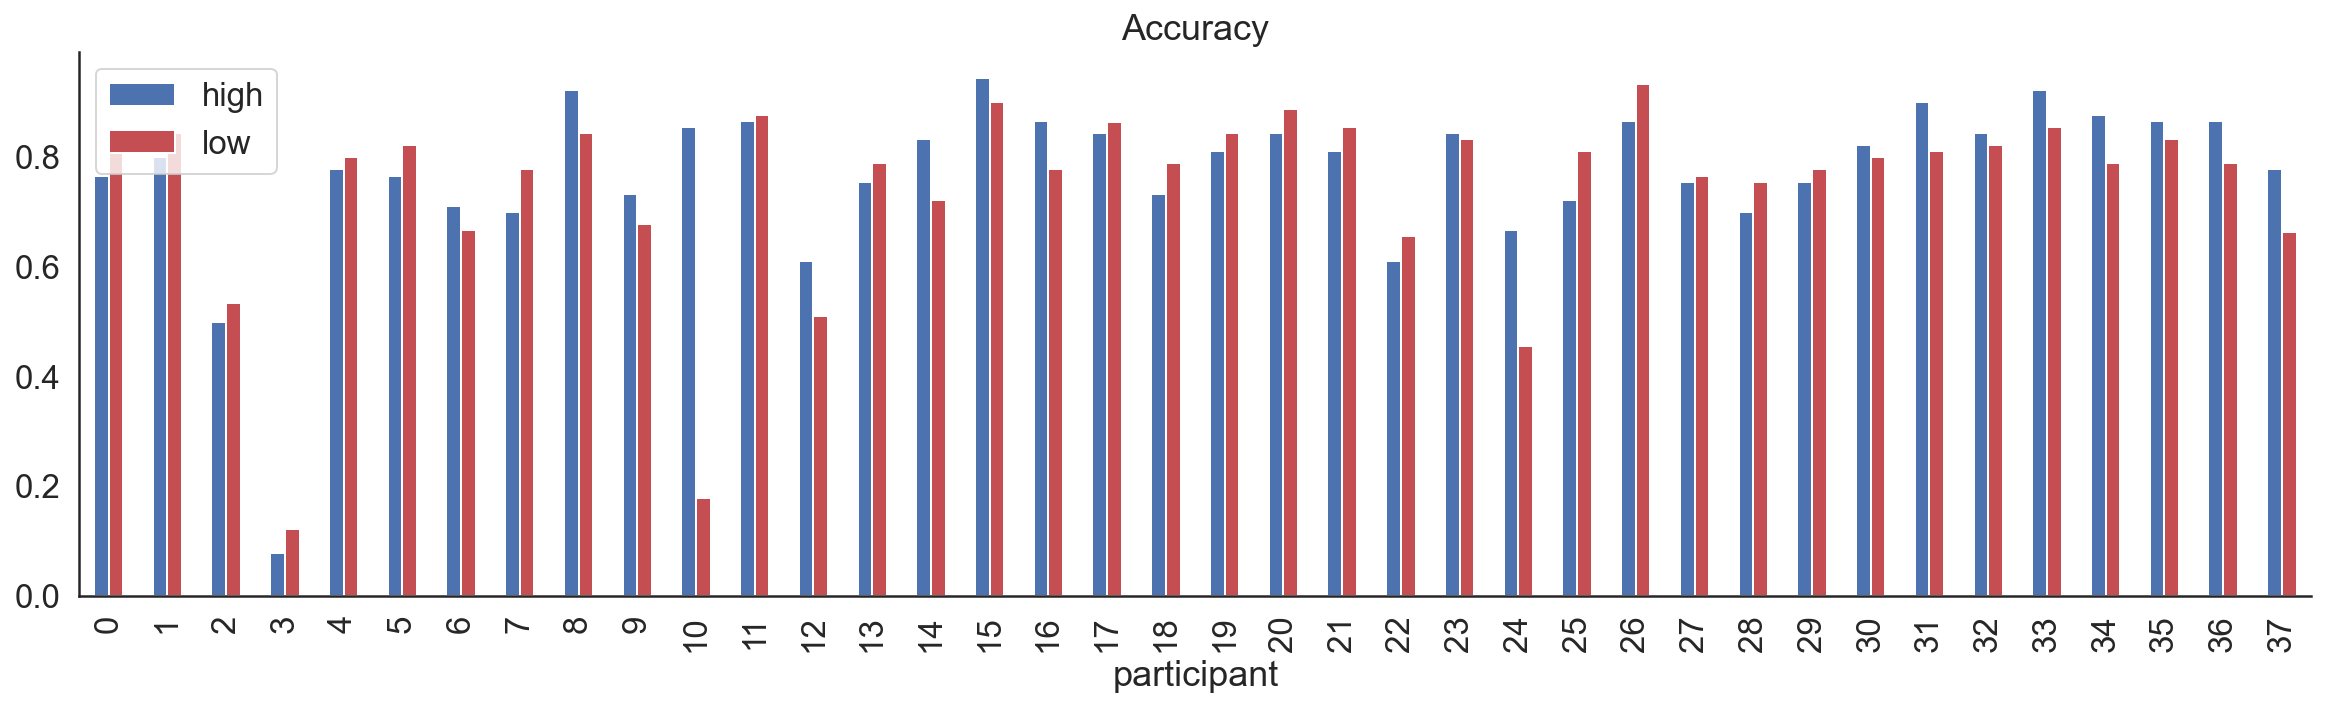

In [125]:
accuracies.plot.bar(x='participant',y=['high','low'], figsize=(20,5),title = 'Accuracy',color = ['b','r'])
#ax.set_ylim(0, 1)
plt.xticks(range(0,len(choiceFrameAll["part"].unique())), choiceFrameAll["part"].unique())
sns.despine()


In [129]:
rejList

[2, 3, 10, 12, 22, 24]

In [130]:
reNameList

['Pilot6', 'Pilot7', 'Pilot14', 'Pilot16', 'Pilot26', 'Pilot28']

In [126]:
accuracies

participant   partName      high       low  highRejected  lowRejected
0             0   [Pilot4]  0.766667  0.822222          True         True
1             1   [Pilot5]  0.800000  0.844444          True         True
2             2   [Pilot6]  0.500000  0.533333         False        False
3             3   [Pilot7]  0.077778  0.122222         False        False
4             4   [Pilot8]  0.777778  0.800000          True         True
5             5   [Pilot9]  0.766667  0.822222          True         True
6             6  [Pilot10]  0.711111  0.666667          True         True
7             7  [Pilot11]  0.700000  0.777778          True         True
8             8  [Pilot12]  0.922222  0.844444          True         True
9             9  [Pilot13]  0.733333  0.677778          True         True
10           10  [Pilot14]  0.855556  0.177778          True        False
11           11  [Pilot15]  0.866667  0.877778          True         True
12           12  [Pilot16]  0.611111  0.511111         False        False
13           13  [Pilot17]  0.755556  0.788889          True         True
14           14  [Pilot18]  0.833333  0.722222          True         True
15           15  [Pilot19]  0.944444  0.900000          True         True
16           16  [Pilot20]  0.866667  0.777778          True         True
17           17  [Pilot21]  0.844444  0.865169          True         True
18           18  [Pilot22]  0.733333  0.788889          True         True
19           19  [Pilot23]  0.811111  0.844444          True         True
20           20  [Pilot24]  0.844444  0.888889          True         True
21           21  [Pilot25]  0.811111  0.855556          True         True
22           22  [Pilot26]  0.611111  0.655556         False         True
23           23  [Pilot27]  0.844444  0.833333          True         True
24           24  [Pilot28]  0.666667  0.455556          True        False
25           25  [Pilot29]  0.722222  0.811111          True         True
26           26  [Pilot30]  0.866667  0.933333          True         True
27           27  [Pilot31]  0.755556  0.766667          True         True
28           28  [Pilot32]  0.700000  0.755556          True         True
29           29    [P33x2]  0.755556  0.777778          True         True
30           30  [Pilot34]  0.822222  0.800000          True         True
31           31  [Pilot35]  0.900000  0.811111          True         True
32           32  [Pilot36]  0.844444  0.822222          True         True
33           33  [Pilot37]  0.922222  0.855556          True         True
34           34  [Pilot38]  0.877778  0.788889          True         True
35           35  [Pilot39]  0.866667  0.833333          True         True
36           36  [Pilot40]  0.866667  0.788889          True         True
37           37  [Pilot41]  0.777778  0.662921          True         True

## there is no significant difference in performanace between frames

In [ ]:
stats.ttest_rel(accuracies.high,accuracies.low)

# check differences in reaction time

In [61]:
rt = pd.DataFrame( columns = [])
rtH = []
rtL = []

for i in choiceFrameAll.part.unique():
    rtH.append(choiceFrameAll.loc[(choiceFrameAll['frame'] == 1) & (choiceFrameAll['part'] == i)].Choice_SND1_RT.mean())
    #print(accuracy_like)

    rtL.append(choiceFrameAll.loc[(choiceFrameAll['frame'] == 2) & (choiceFrameAll['part'] == i)].Choice_SND1_RT.mean())
    #print(accuracy_dislike)

rt['participant'] = range(len(choiceFrameAll.part.unique()))
rt['high'] = rtH
rt['low'] = rtL

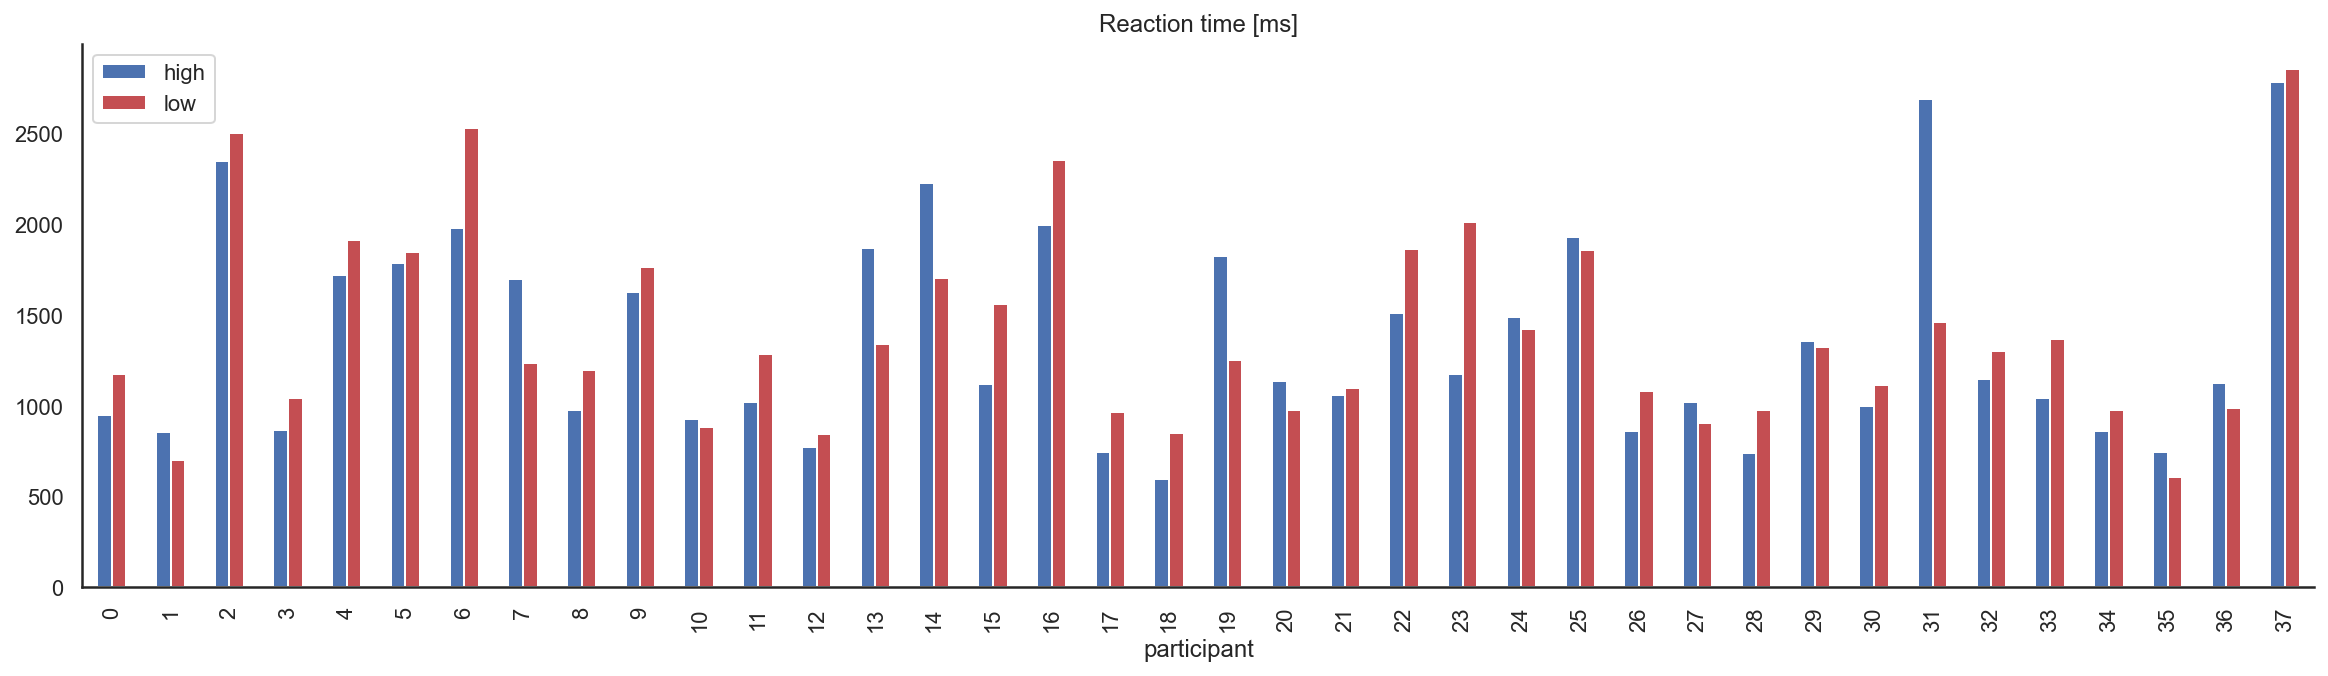

In [62]:
rt.plot.bar(x='participant',y=['high','low'], figsize=(20,5),title = 'Reaction time [ms]',color = ['b','r'])
#ax.set_ylim(0, 1)
plt.xticks(range(0,len(choiceFrameAll["part"].unique())), choiceFrameAll["part"].unique())
sns.despine()


In [ ]:
rt

# no significant difference in reaction time between frames

In [65]:
stats.ttest_rel(rt.high,rt.low)

Ttest_relResult(statistic=-0.6987766943495516, pvalue=0.48906092682022184)

# choice logistic

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.

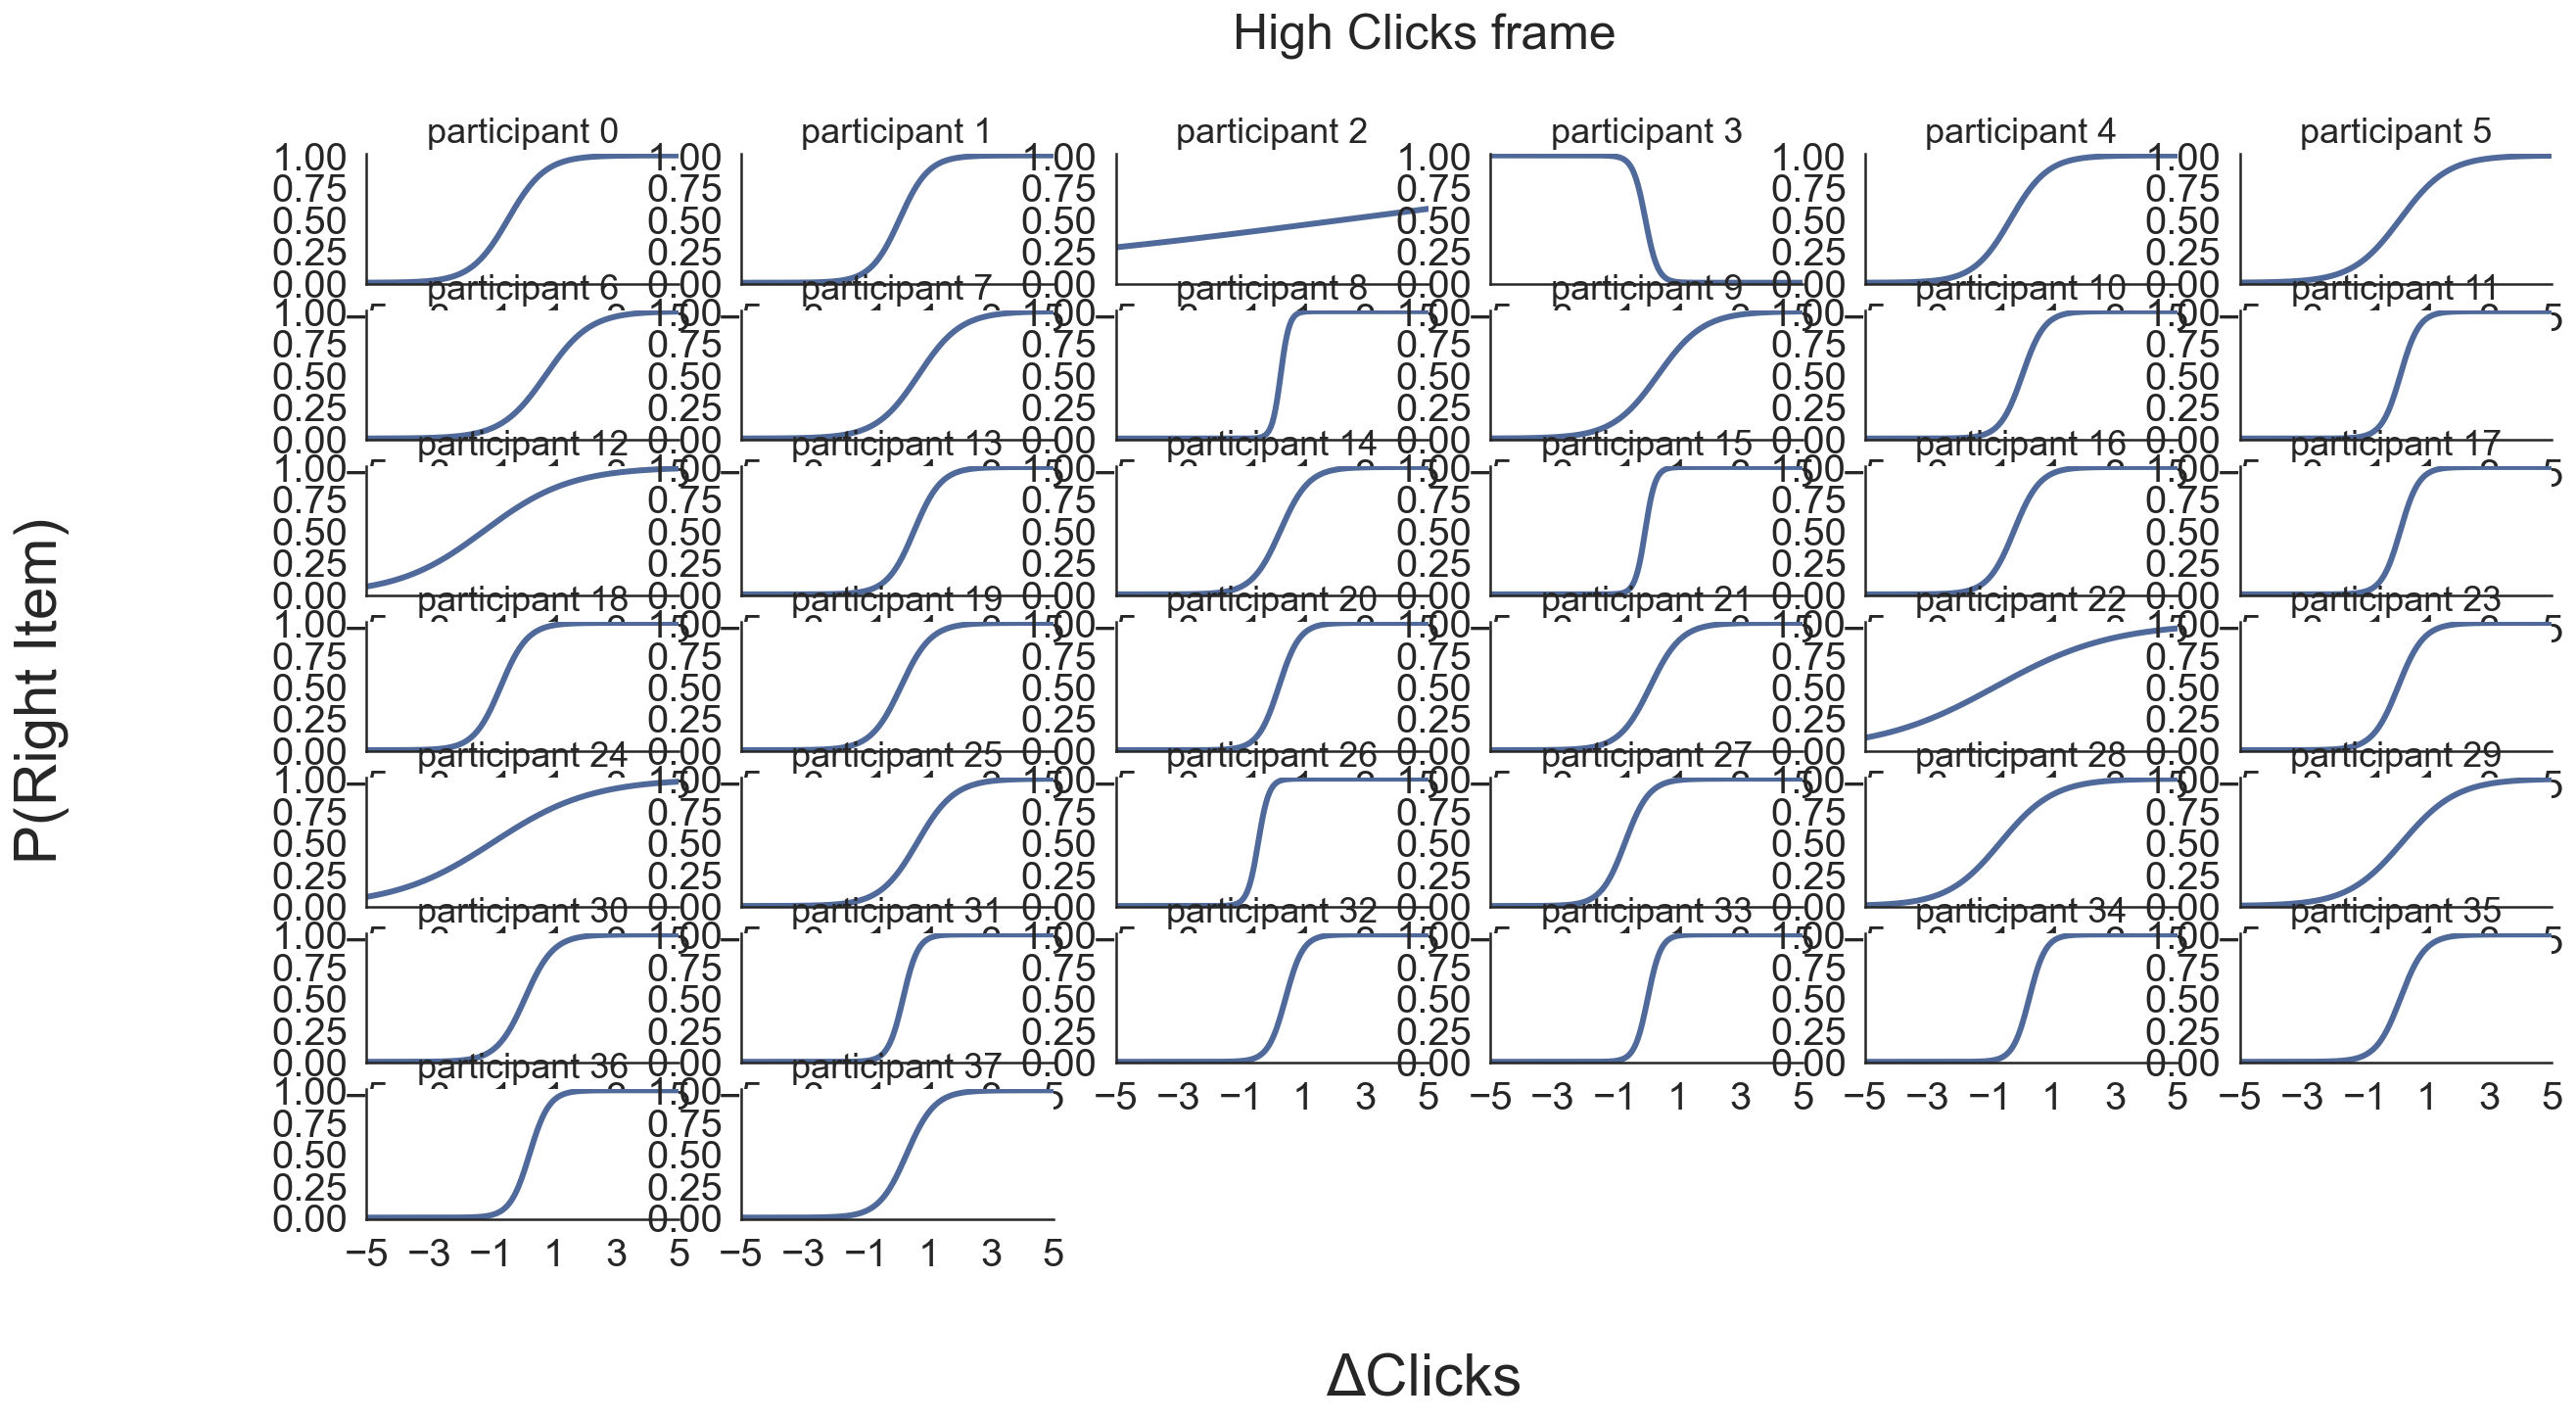

In [66]:
logisticplot_all_part( data=data_expHigh, xaxis='zDFreq', yaxis='Choice', ylab='P(Right Item)', xlab= r'ΔClicks',
                 modlowcol='#4F6A9A', title='High Clicks frame', parvar='part')

In [67]:
#coeficientes_like = logisticplot_all_sbj_slope('ConfSplit', 'High Conf', 'Low Conf', data=data_expHigh, xaxis='zDFreq', yaxis='Choice', ylab='P(Right Item)', xlab='ΔFrequency',
#                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='part')
#plt.tight_layout()

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.

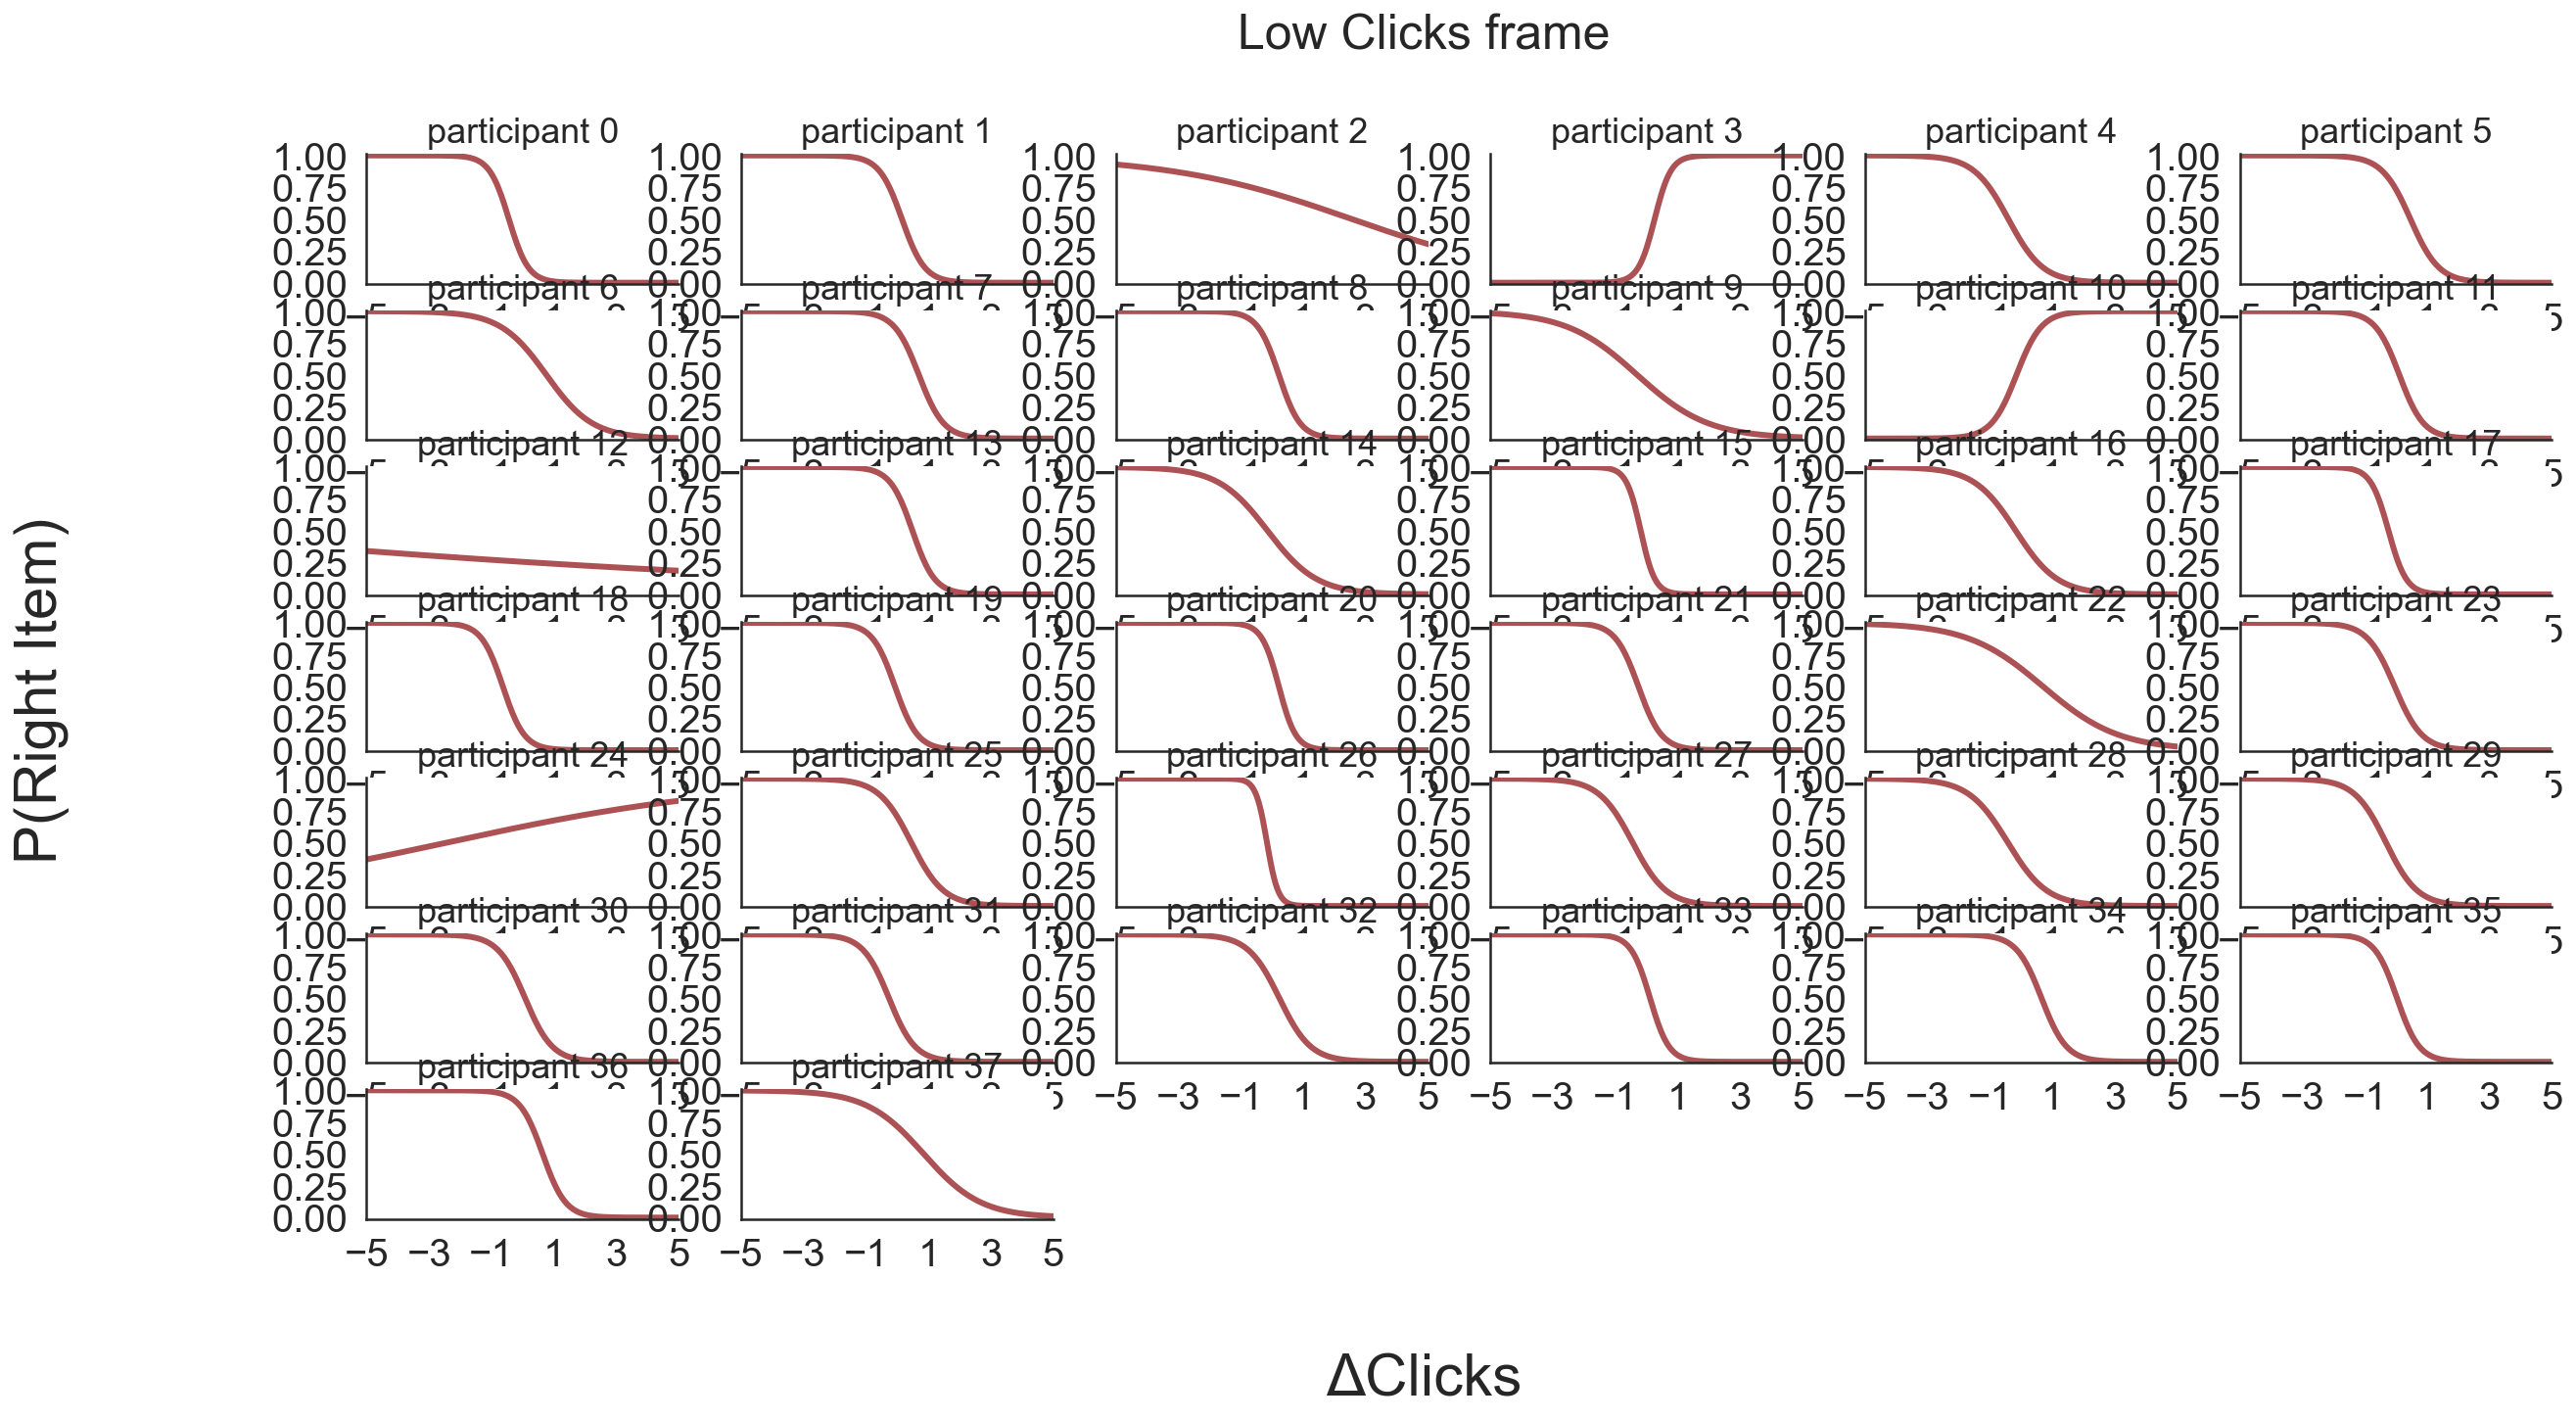

In [68]:
logisticplot_all_part( data=data_expLow, xaxis='zDFreq', yaxis='Choice', ylab='P(Right Item)', xlab= r'ΔClicks',
                 modlowcol='#AC5255', title='Low Clicks frame', parvar='part')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take preceden

Low measure:logit coef = [[1.19199123]] ; Intercept:  [-0.17358684]
high measure:logit coef = [[1.85301438]] ; Intercept:  [0.0704563]


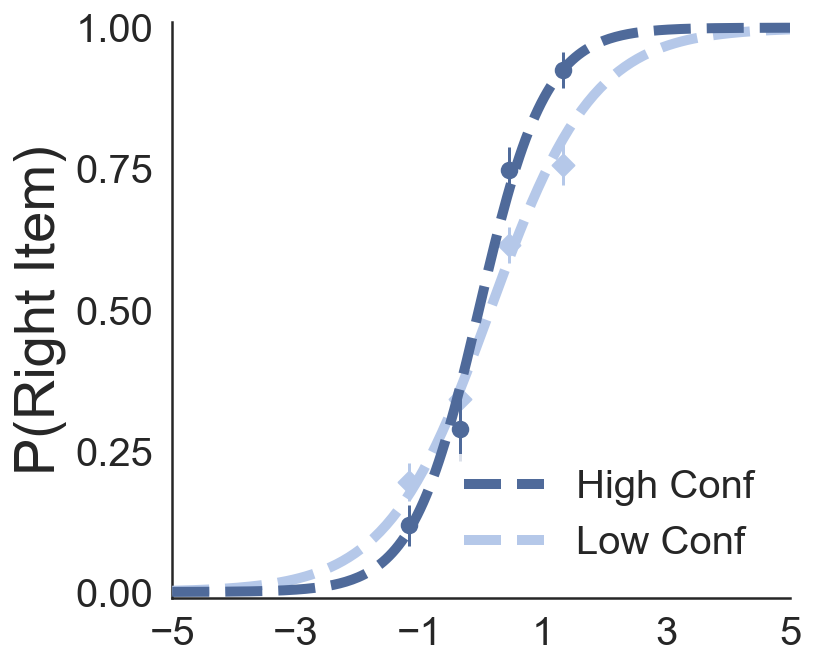

In [69]:
logisticplot_all('ConfSplit', 'High Conf', 'Low Conf', data=data_expHigh, xaxis='zDFreq', yaxis='Choice', ylab='P(Right Item)', xlab='',
                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='part')
plt.tight_layout()

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take preceden

Low measure:logit coef = [[-0.99891626]] ; Intercept:  [0.05910118]
high measure:logit coef = [[-1.56085847]] ; Intercept:  [0.09154996]


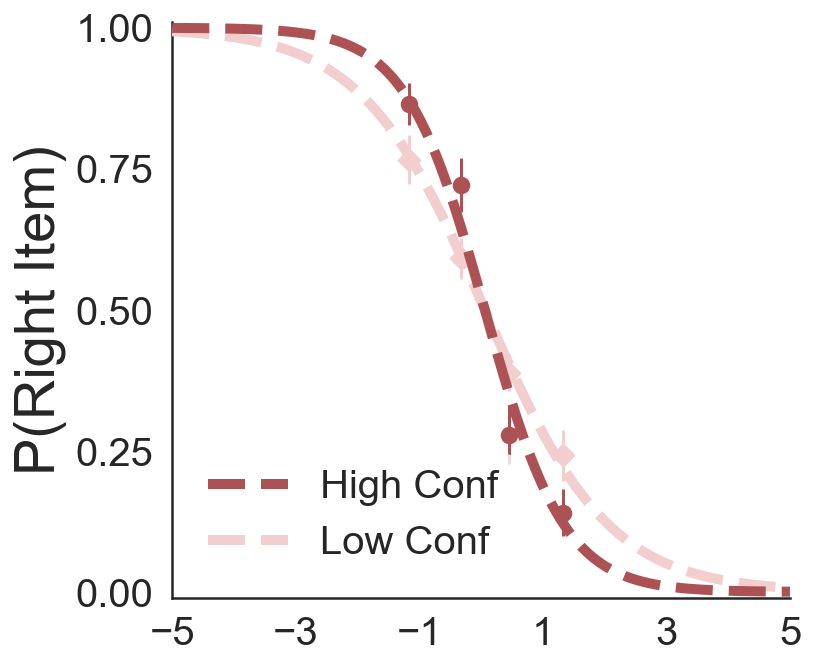

In [70]:
logisticplot_all('ConfSplit', 'High Conf', 'Low Conf', data=data_expLow, xaxis='zDFreq', yaxis='Choice', ylab='P(Right Item)', xlab='',
                 modhighcol='#AC5255', modlowcol='#F2CECF', title='empty', parvar='part')
plt.tight_layout()

Text(0.5, 1.0, 'High Click condition')

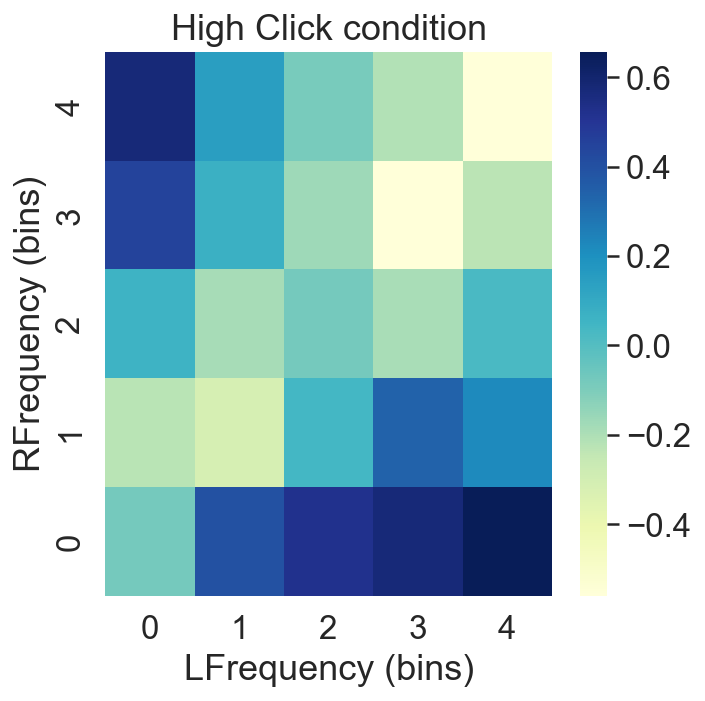

In [71]:
bin_num = 5
choiceFrameAll['LEv_bin'] = pd.to_numeric(pd.qcut(choiceFrameAll["freql"].values, bin_num , labels=range(bin_num)))
choiceFrameAll['REv_bin'] = pd.to_numeric(pd.qcut(choiceFrameAll["freqr"].values, bin_num , labels=range(bin_num)))

choFrameAll1 = choiceFrameAll.loc[choiceFrameAll['frame'] == 1]
df1 = choFrameAll1[['LEv_bin','REv_bin', 'zConf']]
rowIDs = df1['LEv_bin']
colIDs = df1['REv_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].LEv_bin)
        y = int(df1.iloc[i].REv_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].zConf
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 

ax = sns.heatmap(mat_conf2D,cmap="YlGnBu")
ax.invert_yaxis()
plt.xlabel('LFrequency (bins)')
plt.ylabel('RFrequency (bins)')
plt.title('High Click condition')

Text(0.5, 1.0, 'Low Click condition')

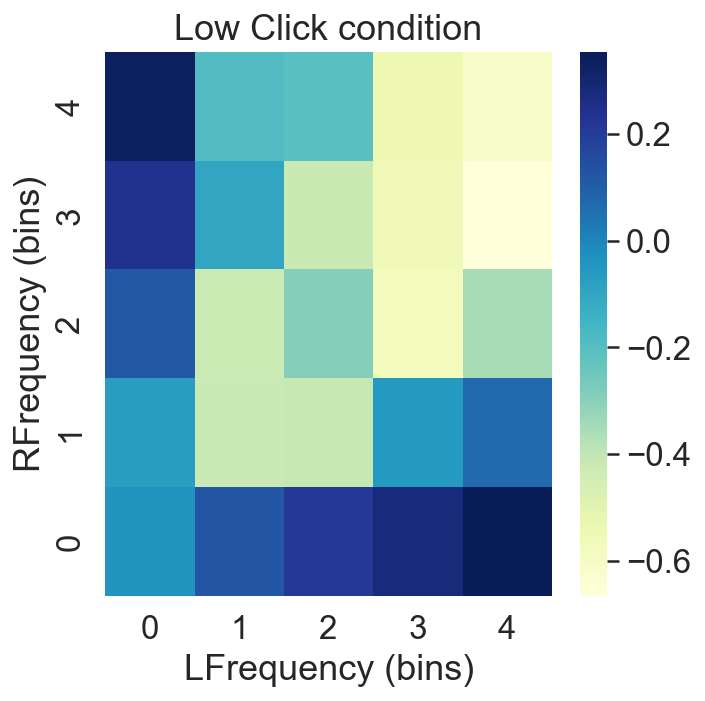

In [72]:

choFrameAll1 = choiceFrameAll.loc[choiceFrameAll['frame'] == 2]
df1 = choFrameAll1[['LEv_bin','REv_bin', 'zConf']]
rowIDs = df1['LEv_bin']
colIDs = df1['REv_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].LEv_bin)
        y = int(df1.iloc[i].REv_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].zConf
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 

ax = sns.heatmap(mat_conf2D,cmap="YlGnBu")
ax.invert_yaxis()
plt.xlabel('LFrequency (bins)')
plt.ylabel('RFrequency (bins)')
plt.title('Low Click condition')

In [73]:
choiceFrameAll.columns

Index(['Session_Name_', 'Trial_Index_', 'expcond', 'trialn', 'noisecond',
       'whichfirstopt', 'noiseinl', 'noiseinr', 'freql', 'freqr', 'frame',
       'Frame_Name', 'Slider_X', 'Choice_SND1_Time', 'CONF', 'CONF_RT',
       'Choice_SND1', 'Choice_SND1_RT', 'TRIAL_N_LIVE', 'itm_1', 'itm', 'part',
       'logRT', 'zRT', 'zLogRT', 'zConf', 'zLFreq', 'zRFreq', 'Choice',
       'totFreq', 'dFreq', 'absDFreq', 'zTotFreq', 'zDFreq', 'zAbsDFreq',
       'choFreq', 'unchoFreq', 'zChoFreq', 'zUnchoFreq', 'ConfSplit',
       'correct', 'LEv_bin', 'REv_bin'],
      dtype='object')

# Pooled regressions

In [74]:
choiceFrameAll

Session_Name_  Trial_Index_     expcond  trialn  noisecond  \
0           Pilot4            21  Experiment     170          1   
1           Pilot4            22  Experiment     128          1   
2           Pilot4            23  Experiment      94          1   
3           Pilot4            24  Experiment     145          1   
4           Pilot4            25  Experiment     120          1   
...            ...           ...         ...     ...        ...   
6833       Pilot41           196  Experiment      72          1   
6834       Pilot41           197  Experiment       2          1   
6835       Pilot41           198  Experiment      35          1   
6836       Pilot41           199  Experiment      25          1   
6837       Pilot41           200  Experiment      53          1   

      whichfirstopt  noiseinl  noiseinr  freql  freqr  ...    zDFreq  \
0                 0         1         1      9      8  ... -0.233550   
1                 0         1         1      5      2  ... -0.700649   
2                 0         1         1      1      5  ...  0.934199   
3                 0         1         1      7      1  ... -1.401298   
4                 0         1         1      4      3  ... -0.233550   
...             ...       ...       ...    ...    ...  ...       ...   
6833              0         1         1      8     10  ...  0.460526   
6834              0         1         1      1      3  ...  0.460526   
6835              0         1         1      4      9  ...  1.163091   
6836              0         1         1      3      8  ...  1.163091   
6837              0         1         1      6      9  ...  0.694714   

     zAbsDFreq  choFreq  unchoFreq  zChoFreq  zUnchoFreq ConfSplit  correct  \
0    -1.206045        9          8  1.275618    0.817832       0.0        0   
1    -0.301511        2          5 -1.174502   -0.223747       1.0        1   
2     0.150756        1          5 -1.524519   -0.223747       1.0        1   
3     1.055290        1          7 -1.524519    0.470639       1.0        1   
4    -1.206045        3          4 -0.824485   -0.570939       0.0        1   
...        ...      ...        ...       ...         ...       ...      ...   
6833 -0.748133        8         10  0.760201    1.705992       0.0        0   
6834 -0.748133        3          1 -0.957931   -1.504701       0.0        1   
6835  0.609122        9          4  1.103828   -0.434470       1.0        1   
6836  0.609122        8          3  0.760201   -0.791214       1.0        1   
6837 -0.295715        9          6  1.103828    0.279017       1.0        1   

      LEv_bin REv_bin  
0           4       3  
1           2       0  
2           0       1  
3           3       0  
4           1       0  
...       ...     ...  
6833        3       4  
6834        0       0  
6835        1       4  
6836        1       3  
6837        2       4  

[6838 rows x 43 columns]

In [75]:
%R -i choiceFrameAll
choiceFrameAll

Session_Name_  Trial_Index_     expcond  trialn  noisecond  \
0           Pilot4            21  Experiment     170          1   
1           Pilot4            22  Experiment     128          1   
2           Pilot4            23  Experiment      94          1   
3           Pilot4            24  Experiment     145          1   
4           Pilot4            25  Experiment     120          1   
...            ...           ...         ...     ...        ...   
6833       Pilot41           196  Experiment      72          1   
6834       Pilot41           197  Experiment       2          1   
6835       Pilot41           198  Experiment      35          1   
6836       Pilot41           199  Experiment      25          1   
6837       Pilot41           200  Experiment      53          1   

      whichfirstopt  noiseinl  noiseinr  freql  freqr  ...    zDFreq  \
0                 0         1         1      9      8  ... -0.233550   
1                 0         1         1      5      2  ... -0.700649   
2                 0         1         1      1      5  ...  0.934199   
3                 0         1         1      7      1  ... -1.401298   
4                 0         1         1      4      3  ... -0.233550   
...             ...       ...       ...    ...    ...  ...       ...   
6833              0         1         1      8     10  ...  0.460526   
6834              0         1         1      1      3  ...  0.460526   
6835              0         1         1      4      9  ...  1.163091   
6836              0         1         1      3      8  ...  1.163091   
6837              0         1         1      6      9  ...  0.694714   

     zAbsDFreq  choFreq  unchoFreq  zChoFreq  zUnchoFreq ConfSplit  correct  \
0    -1.206045        9          8  1.275618    0.817832       0.0        0   
1    -0.301511        2          5 -1.174502   -0.223747       1.0        1   
2     0.150756        1          5 -1.524519   -0.223747       1.0        1   
3     1.055290        1          7 -1.524519    0.470639       1.0        1   
4    -1.206045        3          4 -0.824485   -0.570939       0.0        1   
...        ...      ...        ...       ...         ...       ...      ...   
6833 -0.748133        8         10  0.760201    1.705992       0.0        0   
6834 -0.748133        3          1 -0.957931   -1.504701       0.0        1   
6835  0.609122        9          4  1.103828   -0.434470       1.0        1   
6836  0.609122        8          3  0.760201   -0.791214       1.0        1   
6837 -0.295715        9          6  1.103828    0.279017       1.0        1   

      LEv_bin REv_bin  
0           4       3  
1           2       0  
2           0       1  
3           3       0  
4           1       0  
...       ...     ...  
6833        3       4  
6834        0       0  
6835        1       4  
6836        1       3  
6837        2       4  

[6838 rows x 43 columns]

In [76]:
%%R
# Separating the data for both conditions 
data_exp1_H <- choiceFrameAll[ which(choiceFrameAll$frame=='1'), ]
data_exp1_L <- choiceFrameAll[ which(choiceFrameAll$frame=='2'), ]

[1] "High BIC:"
[1] 3439.064
[1] "Low BIC:"
[1] 3731.507


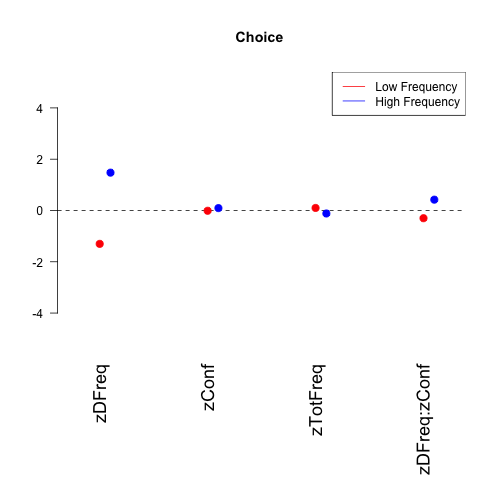

In [77]:
%%R
title_plot = "Choice "

ModelChoiceH_1 <- glm(Choice ~  zDFreq + zConf + zTotFreq + zDFreq:zConf  , data=data_exp1_H, family=binomial(link="logit"))
ModelChoiceL_1 <- glm(Choice ~   zDFreq + zConf + zTotFreq + zDFreq:zConf , data=data_exp1_L, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceH_1)
BIC2 = BIC(ModelChoiceL_1)

summary
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelChoiceL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-5, 5) ,main=title_plot)
coefplot(ModelChoiceH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Frequency", "High Frequency"),col=c("red", "blue"), lty=1:1, cex=1)


Call:
glm(formula = zConf ~ zAbsDFreq + zRT + zTotFreq, data = data_exp1_H)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.9154  -0.5432   0.0992   0.5922   4.6824  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.09016    0.01515   5.953 2.90e-09 ***
zAbsDFreq    0.25073    0.01539  16.293  < 2e-16 ***
zRT         -0.30466    0.01509 -20.196  < 2e-16 ***
zTotFreq    -0.07729    0.01514  -5.105 3.48e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.7830631)

    Null deviance: 3343.0  on 3419  degrees of freedom
Residual deviance: 2674.9  on 3416  degrees of freedom
AIC: 8875.2

Number of Fisher Scoring iterations: 2


Call:
glm(formula = zConf ~ zAbsDFreq + zRT + zTotFreq, data = data_exp1_L)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4824  -0.6265   0.0713   0.6357   4.4743  

Coefficients:
            Estimate Std. 

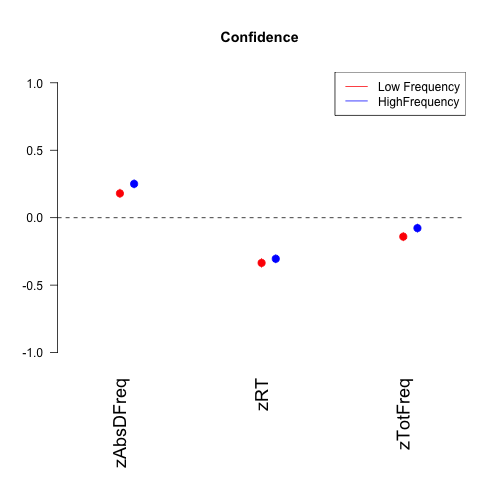

In [78]:
%%R
title_plot = "Confidence "

ModelChoiceH_1 <- glm(zConf ~  zAbsDFreq + zRT + zTotFreq  , data=data_exp1_H)
ModelChoiceL_1 <- glm(zConf ~  zAbsDFreq + zRT + zTotFreq  , data=data_exp1_L)

BIC1 = BIC(ModelChoiceH_1)
BIC2 = BIC(ModelChoiceL_1)


print(summary(ModelChoiceH_1))
print(summary(ModelChoiceL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)


print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelChoiceL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelChoiceH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Frequency", "HighFrequency"),col=c("red", "blue"), lty=1:1, cex=1)


Call:
glm(formula = zConf ~ zAbsDFreq + zRT + zChoFreq + zUnchoFreq, 
    data = data_exp1_H)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.9430  -0.5425   0.0957   0.5975   4.4984  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.01645    0.01925   0.854   0.3929    
zAbsDFreq    0.18702    0.01848  10.118  < 2e-16 ***
zRT         -0.29458    0.01510 -19.513  < 2e-16 ***
zChoFreq     0.03959    0.01929   2.052   0.0402 *  
zUnchoFreq  -0.14478    0.01815  -7.976 2.04e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.7748263)

    Null deviance: 3343  on 3419  degrees of freedom
Residual deviance: 2646  on 3415  degrees of freedom
AIC: 8840

Number of Fisher Scoring iterations: 2


Call:
glm(formula = zConf ~ zAbsDFreq + zRT + zChoFreq + zUnchoFreq, 
    data = data_exp1_L)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5

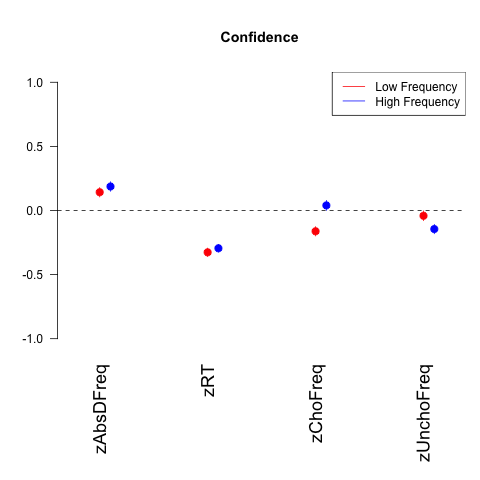

In [79]:
%%R
title_plot = "Confidence "

ModelChoiceH_1 <- glm(zConf ~  zAbsDFreq + zRT + zChoFreq + zUnchoFreq  , data=data_exp1_H)
ModelChoiceL_1 <- glm(zConf ~  zAbsDFreq + zRT + zChoFreq + zUnchoFreq , data=data_exp1_L)

BIC1 = BIC(ModelChoiceH_1)
BIC2 = BIC(ModelChoiceL_1)

print(summary(ModelChoiceH_1))
print(summary(ModelChoiceL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelChoiceL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelChoiceH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Frequency", "High Frequency"),col=c("red", "blue"), lty=1:1, cex=1)


Call:
glm(formula = zLogRT ~ zAbsDFreq + zTotFreq, data = data_exp1_H)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.6780  -0.6907  -0.0576   0.6370   5.5518  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.06682    0.01700  -3.930 8.68e-05 ***
zAbsDFreq   -0.23465    0.01700 -13.800  < 2e-16 ***
zTotFreq     0.04955    0.01701   2.914   0.0036 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.9627894)

    Null deviance: 3394.7  on 3329  degrees of freedom
Residual deviance: 3203.2  on 3327  degrees of freedom
  (90 observations deleted due to missingness)
AIC: 9328.9

Number of Fisher Scoring iterations: 2


Call:
glm(formula = zLogRT ~ zAbsDFreq + zTotFreq, data = data_exp1_L)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.4716  -0.6484  -0.0326   0.6435   3.3716  

Coefficients:
            Estimate Std. Error t value Pr

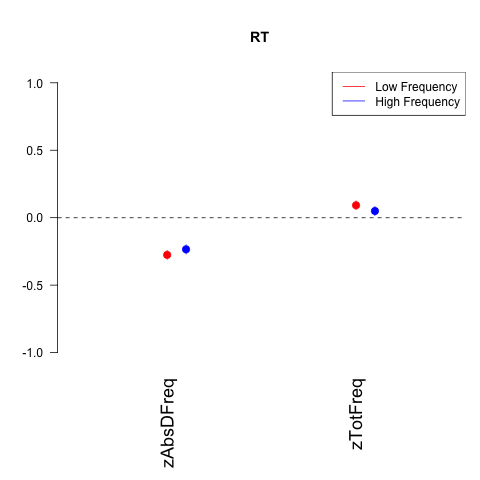

In [80]:
%%R
title_plot = "RT "

ModelChoiceH_1 <- glm(zLogRT ~  zAbsDFreq  + zTotFreq  , data=data_exp1_H)
ModelChoiceL_1 <- glm(zLogRT ~  zAbsDFreq  + zTotFreq, data=data_exp1_L)

BIC1 = BIC(ModelChoiceH_1)
BIC2 = BIC(ModelChoiceL_1)

print(summary(ModelChoiceH_1))
print(summary(ModelChoiceL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelChoiceL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelChoiceH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Frequency", "High Frequency"),col=c("red", "blue"), lty=1:1, cex=1)


Call:
glm(formula = zLogRT ~ zAbsDFreq + zChoFreq + zUnchoFreq, data = data_exp1_H)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.7375  -0.6854  -0.0504   0.6315   5.5459  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.03233    0.02144   1.508    0.132    
zAbsDFreq   -0.14682    0.02054  -7.147 1.09e-12 ***
zChoFreq    -0.09371    0.02145  -4.368 1.29e-05 ***
zUnchoFreq   0.15460    0.02016   7.669 2.26e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.9471503)

    Null deviance: 3394.7  on 3329  degrees of freedom
Residual deviance: 3150.2  on 3326  degrees of freedom
  (90 observations deleted due to missingness)
AIC: 9275.3

Number of Fisher Scoring iterations: 2


Call:
glm(formula = zLogRT ~ zAbsDFreq + zChoFreq + zUnchoFreq, data = data_exp1_L)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.3875  -0.6547  -0.037

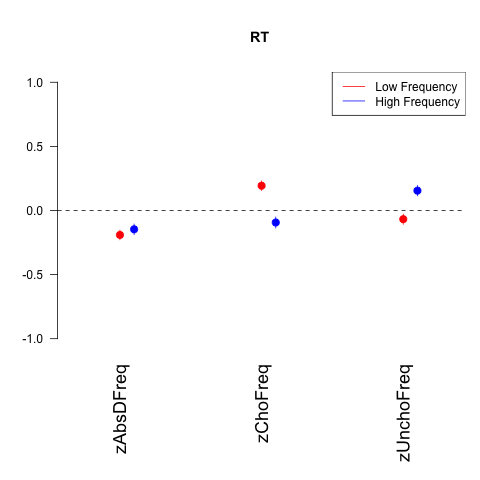

In [81]:
%%R
title_plot = "RT "

ModelChoiceH_1 <- glm(zLogRT ~  zAbsDFreq  + zChoFreq + zUnchoFreq  , data=data_exp1_H)
ModelChoiceL_1 <- glm(zLogRT ~  zAbsDFreq  + zChoFreq + zUnchoFreq , data=data_exp1_L)

BIC1 = BIC(ModelChoiceH_1)
BIC2 = BIC(ModelChoiceL_1)

print(summary(ModelChoiceH_1))
print(summary(ModelChoiceL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelChoiceL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelChoiceH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Frequency", "High Frequency"),col=c("red", "blue"), lty=1:1, cex=1)

# hierarchical models

## Choice

In [68]:
from pymer4.models import Lmer


In [69]:
data_expLow = data_expLow.drop(columns = ['DVBin2'])
data_expHigh = data_expHigh.drop(columns = ['DVBin2'])


In [70]:
from pymer4.models import Lmer

regFormula1 = "Choice ~  zDFreq + zConf + zTotFreq + zDFreq:zConf + (zDFreq + zConf + zTotFreq + zDFreq:zConf|part) "

model1 = Lmer(regFormula1, data=data_expHigh, family = 'binomial')
model2 = Lmer(regFormula1, data=data_expLow, family = 'binomial')

model1.fit()
model2.fit()

table_data1 = model1.coefs.T
table_data2 = model2.coefs.T

par_table_data1 = model1.fixef
par_table_data2 = model2.fixef

unable to evaluate scaled gradient 

Model failed to converge: degenerate  Hessian with 1 negative eigenvalues 

Formula: Choice~zDFreq+zConf+zTotFreq+zDFreq:zConf+(zDFreq+zConf+zTotFreq+zDFreq:zConf|part)

Family: binomial	 Inference: parametric

Number of observations: 2880	 Groups: {'part': 32.0}

Log-likelihood: -1129.559 	 AIC: 2299.118

Random effects:

              Name    Var    Std
part   (Intercept)  0.690  0.831
part        zDFreq  1.713  1.309
part         zConf  0.122  0.349
part      zTotFreq  0.023  0.152
part  zDFreq:zConf  0.417  0.646

              IV1           IV2   Corr
part  (Intercept)        zDFreq -0.148
part  (Intercept)         zConf  0.973
part  (Intercept)      zTotFreq  0.492
part  (Intercept)  zDFreq:zConf -0.261
part       zDFreq         zConf  0.084
part       zDFreq      zTotFreq  0.674
part       zDFreq  zDFreq:zConf  0.864
part        zConf      zTotFreq  0.652
part        zConf  zDFreq:zConf -0.062
part     zTotFreq  zDFreq:zConf  0.712

Fixed eff

In [71]:
table_data1

(Intercept)       zDFreq      zConf    zTotFreq zDFreq:zConf
Estimate       -0.223923      2.75207  -0.018409   -0.115423      1.14438
2.5_ci         -0.544058      2.22764  -0.194383   -0.223913     0.827982
97.5_ci        0.0962126      3.27649   0.157565 -0.00693218      1.46079
SE              0.163337      0.26757  0.0897841   0.0553533     0.161433
OR              0.799377       15.675   0.981759     0.89099      3.14051
OR_2.5_ci       0.580388      9.27794   0.823343    0.799385      2.28869
OR_97.5_ci       1.10099      26.4827    1.17066    0.993092      4.30935
Prob            0.444252      0.94003   0.495398    0.471176     0.758484
Prob_2.5_ci     0.367244     0.902704   0.451557    0.444254     0.695928
Prob_97.5_ci    0.524035     0.963614    0.53931    0.498267     0.811653
Z-stat          -1.37092      10.2854  -0.205037     -2.0852      7.08891
P-val           0.170399  8.19794e-25   0.837544   0.0370512  1.35176e-12
Sig                               ***                      *          ***

In [72]:
table_data2

(Intercept)       zDFreq      zConf   zTotFreq zDFreq:zConf
Estimate        0.064125       -2.595 -0.0653149   0.076121    -0.883042
2.5_ci         -0.295119     -3.03246  -0.261317 -0.0555085     -1.13477
97.5_ci         0.423369     -2.15755   0.130687   0.207751     -0.63131
SE              0.183291     0.223195   0.100003  0.0671592     0.128437
OR               1.06623    0.0746457   0.936772    1.07909     0.413523
OR_2.5_ci       0.744443    0.0481971   0.770037   0.946004     0.321495
OR_97.5_ci        1.5271     0.115608    1.13961    1.23091     0.531895
Prob            0.516026    0.0694607   0.483677   0.519021     0.292548
Prob_2.5_ci     0.426751    0.0459809    0.43504   0.486126     0.243281
Prob_97.5_ci    0.604289     0.103628   0.532625   0.551752     0.347214
Z-stat          0.349853     -11.6266   -0.65313    1.13344     -6.87529
P-val           0.726449  3.01835e-31   0.513673   0.257029   6.1864e-12
Sig                               ***                                ***

([<matplotlib.axis.XTick at 0x7fa9d8873240>,
 [Text(1.25, 0, '(Inter)'),
  Text(2.25, 0, 'ΔClicks'),
  Text(3.25, 0, 'Conf'),
  Text(4.25, 0, 'ΣClicks'),
  Text(5.25, 0, 'ΔClicks x\nConf')])

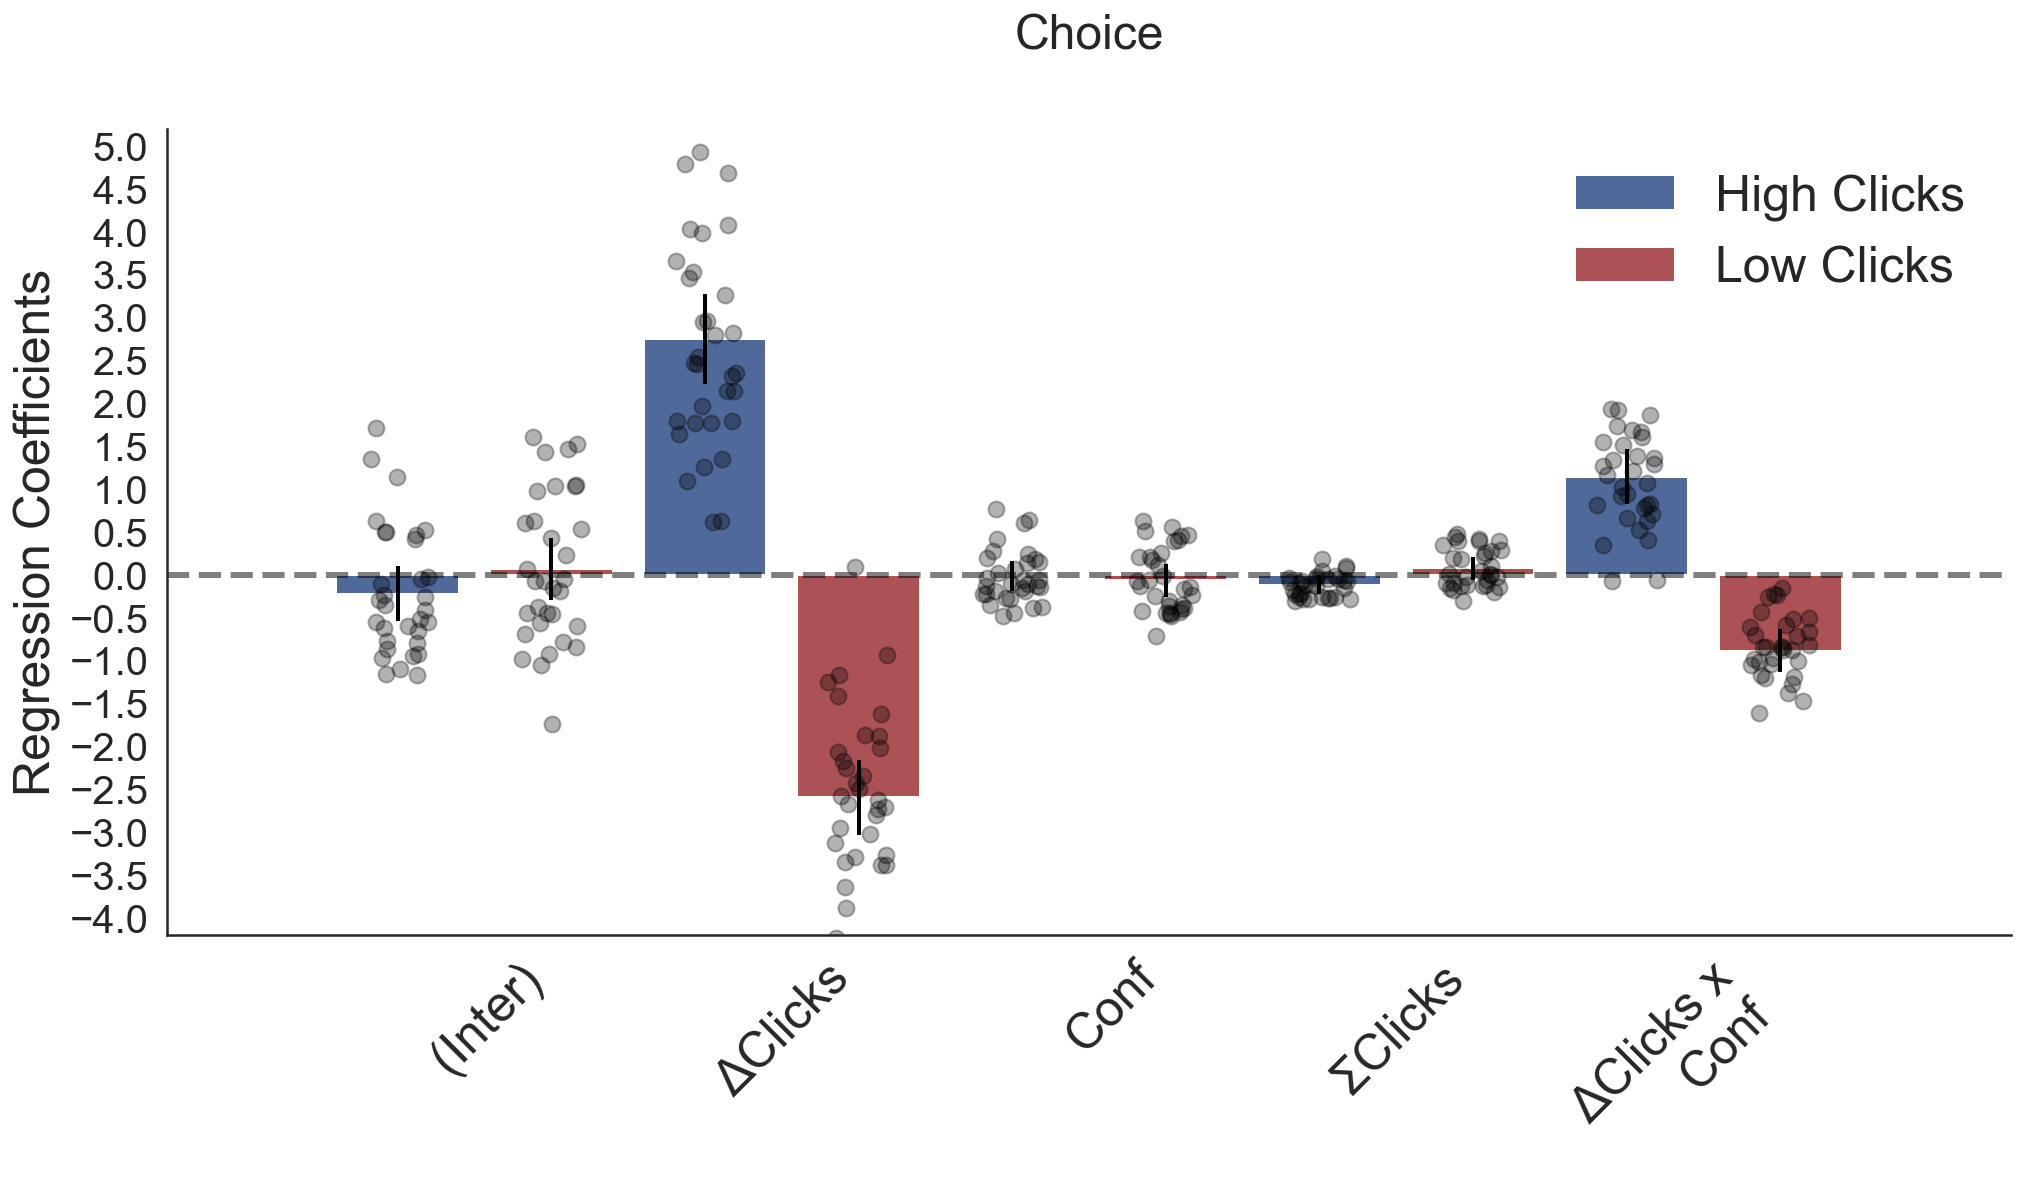

In [73]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Choice', size='big', ticklabsize=20,labels= ['High Clicks','Low Clicks'])
#plt.ylim(-0.4, 0.4)

#plt.xlim(-, 0.4)

plt.xticks([1.25,2.25,3.25, 4.25,5.25],['(Inter)','ΔClicks','Conf','ΣClicks','ΔClicks x\nConf'], rotation=45)

In [74]:
del table_data2['(Intercept)']
del table_data1['(Intercept)']
del par_table_data1['(Intercept)']
del par_table_data2['(Intercept)']

([<matplotlib.axis.XTick at 0x7fa9a973d240>,
 [Text(1.25, 0, 'ΔClicks'),
  Text(2.25, 0, 'Conf'),
  Text(3.25, 0, 'ΣClicks'),
  Text(4.25, 0, 'ΔClicks x\nConf')])

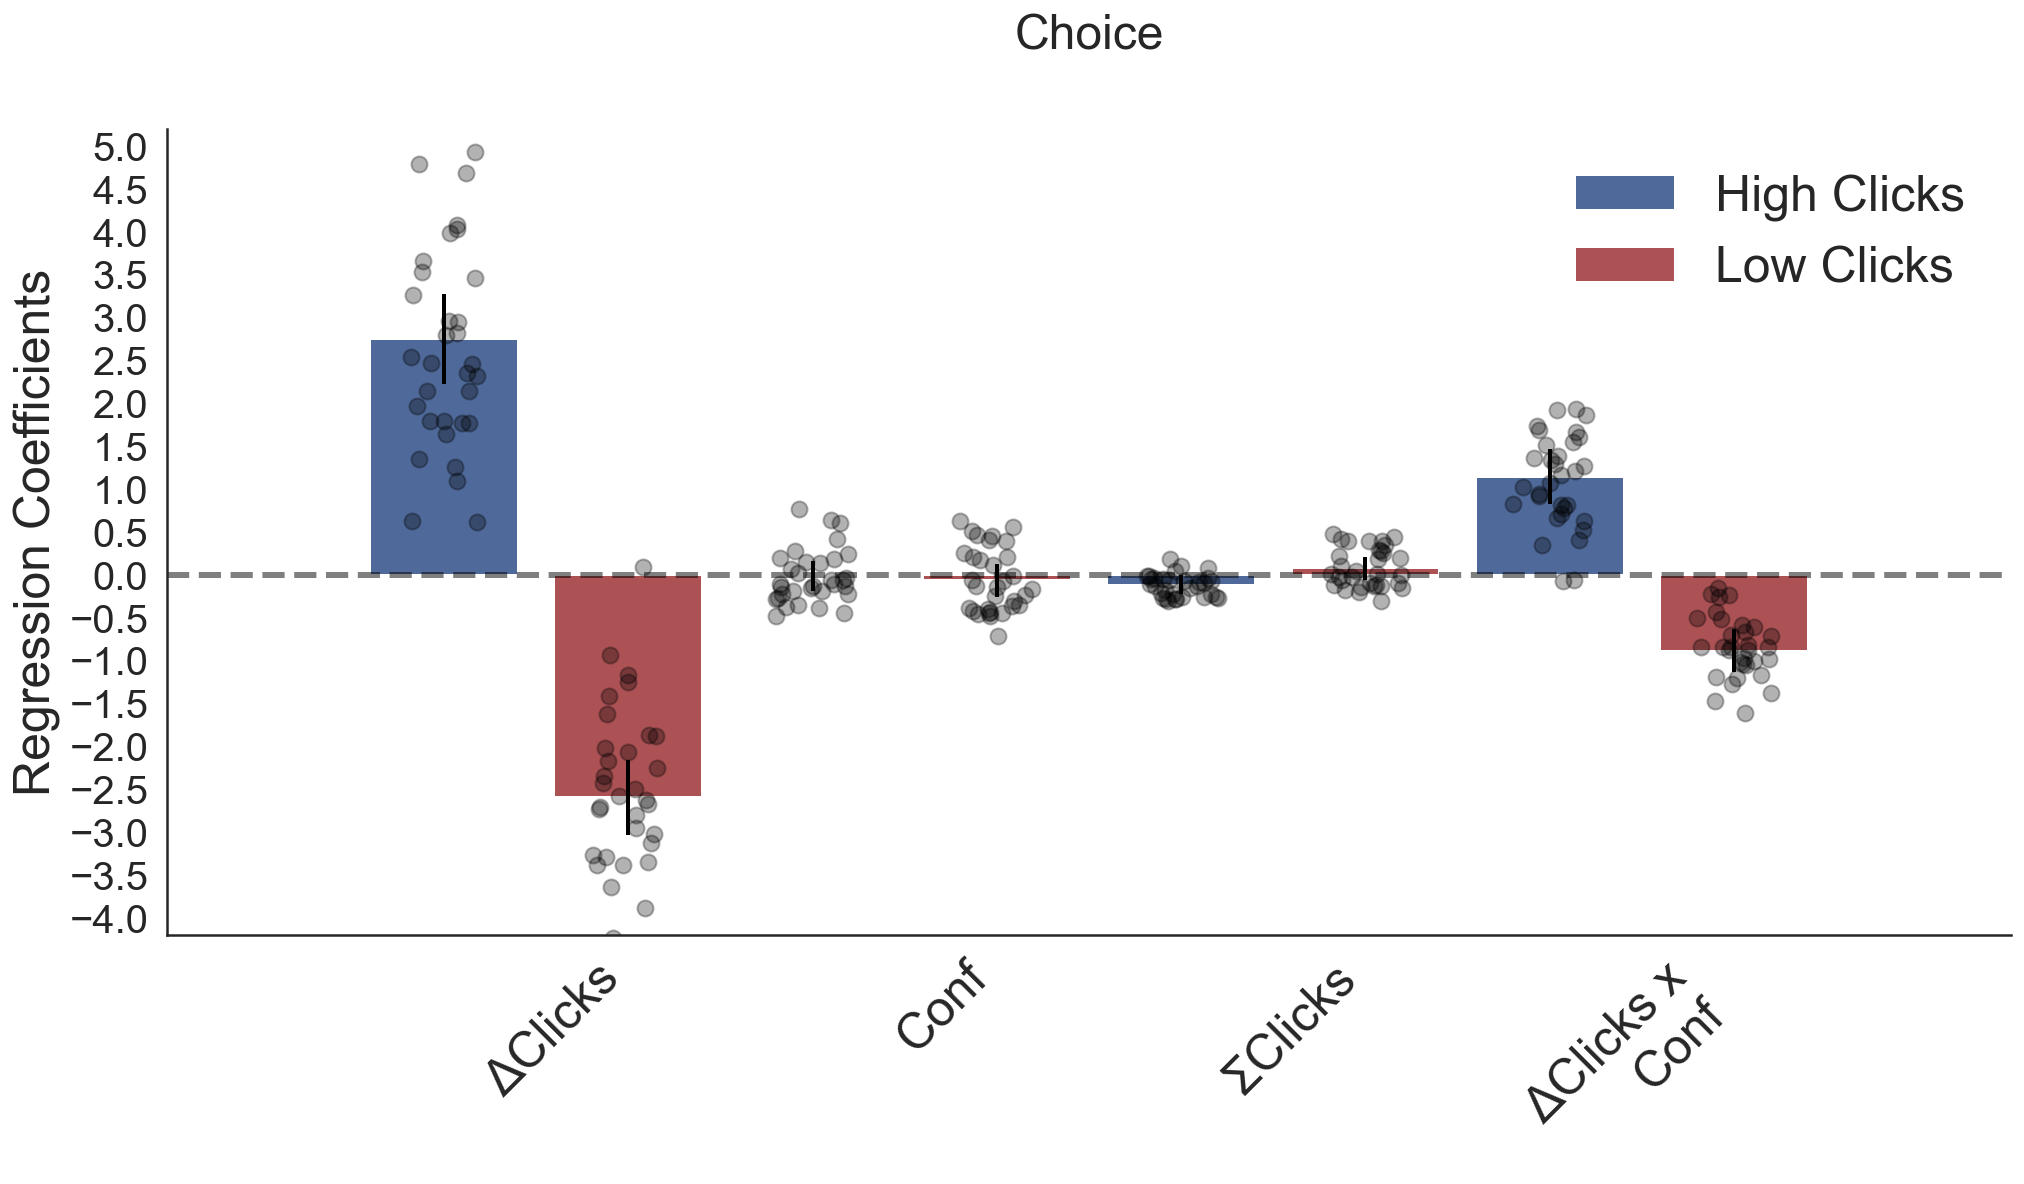

In [75]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Choice', size='big', ticklabsize=20,labels= ['High Clicks','Low Clicks'])
#plt.ylim(-0.4, 0.4)

#plt.xlim(-, 0.4)

plt.xticks([1.25,2.25,3.25, 4.25],['ΔClicks','Conf','ΣClicks','ΔClicks x\nConf'], rotation=45)

## Confidence

In [76]:
regFormula1 = "zConf ~    zAbsDFreq + zRT + zTotFreq + (zAbsDFreq + zRT + zTotFreq|part) "

model1 = Lmer(regFormula1, data=data_expHigh)
model2 = Lmer(regFormula1, data=data_expLow)

model1.fit()
model2.fit()

table_data1 = model1.coefs.T
table_data2 = model2.coefs.T

par_table_data1 = model1.fixef
par_table_data2 = model2.fixef

Formula: zConf~zAbsDFreq+zRT+zTotFreq+(zAbsDFreq+zRT+zTotFreq|part)

Family: gaussian	 Inference: parametric

Number of observations: 2880	 Groups: {'part': 32.0}

Log-likelihood: -3630.908 	 AIC: 7261.815

Random effects:

                 Name    Var    Std
part      (Intercept)  0.018  0.133
part        zAbsDFreq  0.019  0.138
part              zRT  0.024  0.154
part         zTotFreq  0.021  0.144
Residual               0.689  0.830

              IV1        IV2   Corr
part  (Intercept)  zAbsDFreq -0.463
part  (Intercept)        zRT  0.577
part  (Intercept)   zTotFreq  0.606
part    zAbsDFreq        zRT -0.297
part    zAbsDFreq   zTotFreq -0.589
part          zRT   zTotFreq  0.343

Fixed effects:

boundary (singular) fit: see ?isSingular 

Formula: zConf~zAbsDFreq+zRT+zTotFreq+(zAbsDFreq+zRT+zTotFreq|part)

Family: gaussian	 Inference: parametric

Number of observations: 2878	 Groups: {'part': 32.0}

Log-likelihood: -3701.324 	 AIC: 7402.648

Random effects:

                 Name  

In [77]:
table_data1

(Intercept)    zAbsDFreq          zRT    zTotFreq
Estimate    0.100151     0.246262    -0.313412  -0.0624374
2.5_ci     0.0448932     0.189089    -0.375783   -0.120935
97.5_ci     0.155409     0.303435    -0.251042 -0.00393985
SE         0.0281934    0.0291706    0.0318222   0.0298462
DF           30.7626      31.3135      32.0737     30.9084
T-stat        3.5523      8.44212     -9.84884    -2.09197
P-val     0.00125434  1.43062e-09  3.20709e-11   0.0447502
Sig               **          ***          ***           *

In [78]:
table_data2

(Intercept)    zAbsDFreq          zRT     zTotFreq
Estimate     -0.11217     0.173308    -0.363483    -0.136466
2.5_ci      -0.165888     0.123432    -0.445553    -0.184918
97.5_ci    -0.0584521     0.223184    -0.281413   -0.0880144
SE          0.0274076    0.0254473    0.0418731    0.0247208
DF            30.9347      33.7748      25.6812      32.5022
T-stat       -4.09266      6.81045     -8.68058      -5.5203
P-val     0.000283022  8.05584e-08  4.10336e-09  4.16276e-06
Sig               ***          ***          ***          ***

([<matplotlib.axis.XTick at 0x7fa9e8ed9a58>,
 [Text(1.25, 0, '(Inter)'),
  Text(2.25, 0, '|ΔClicks|'),
  Text(3.25, 0, 'RT'),
  Text(4.25, 0, 'ΣClicks')])

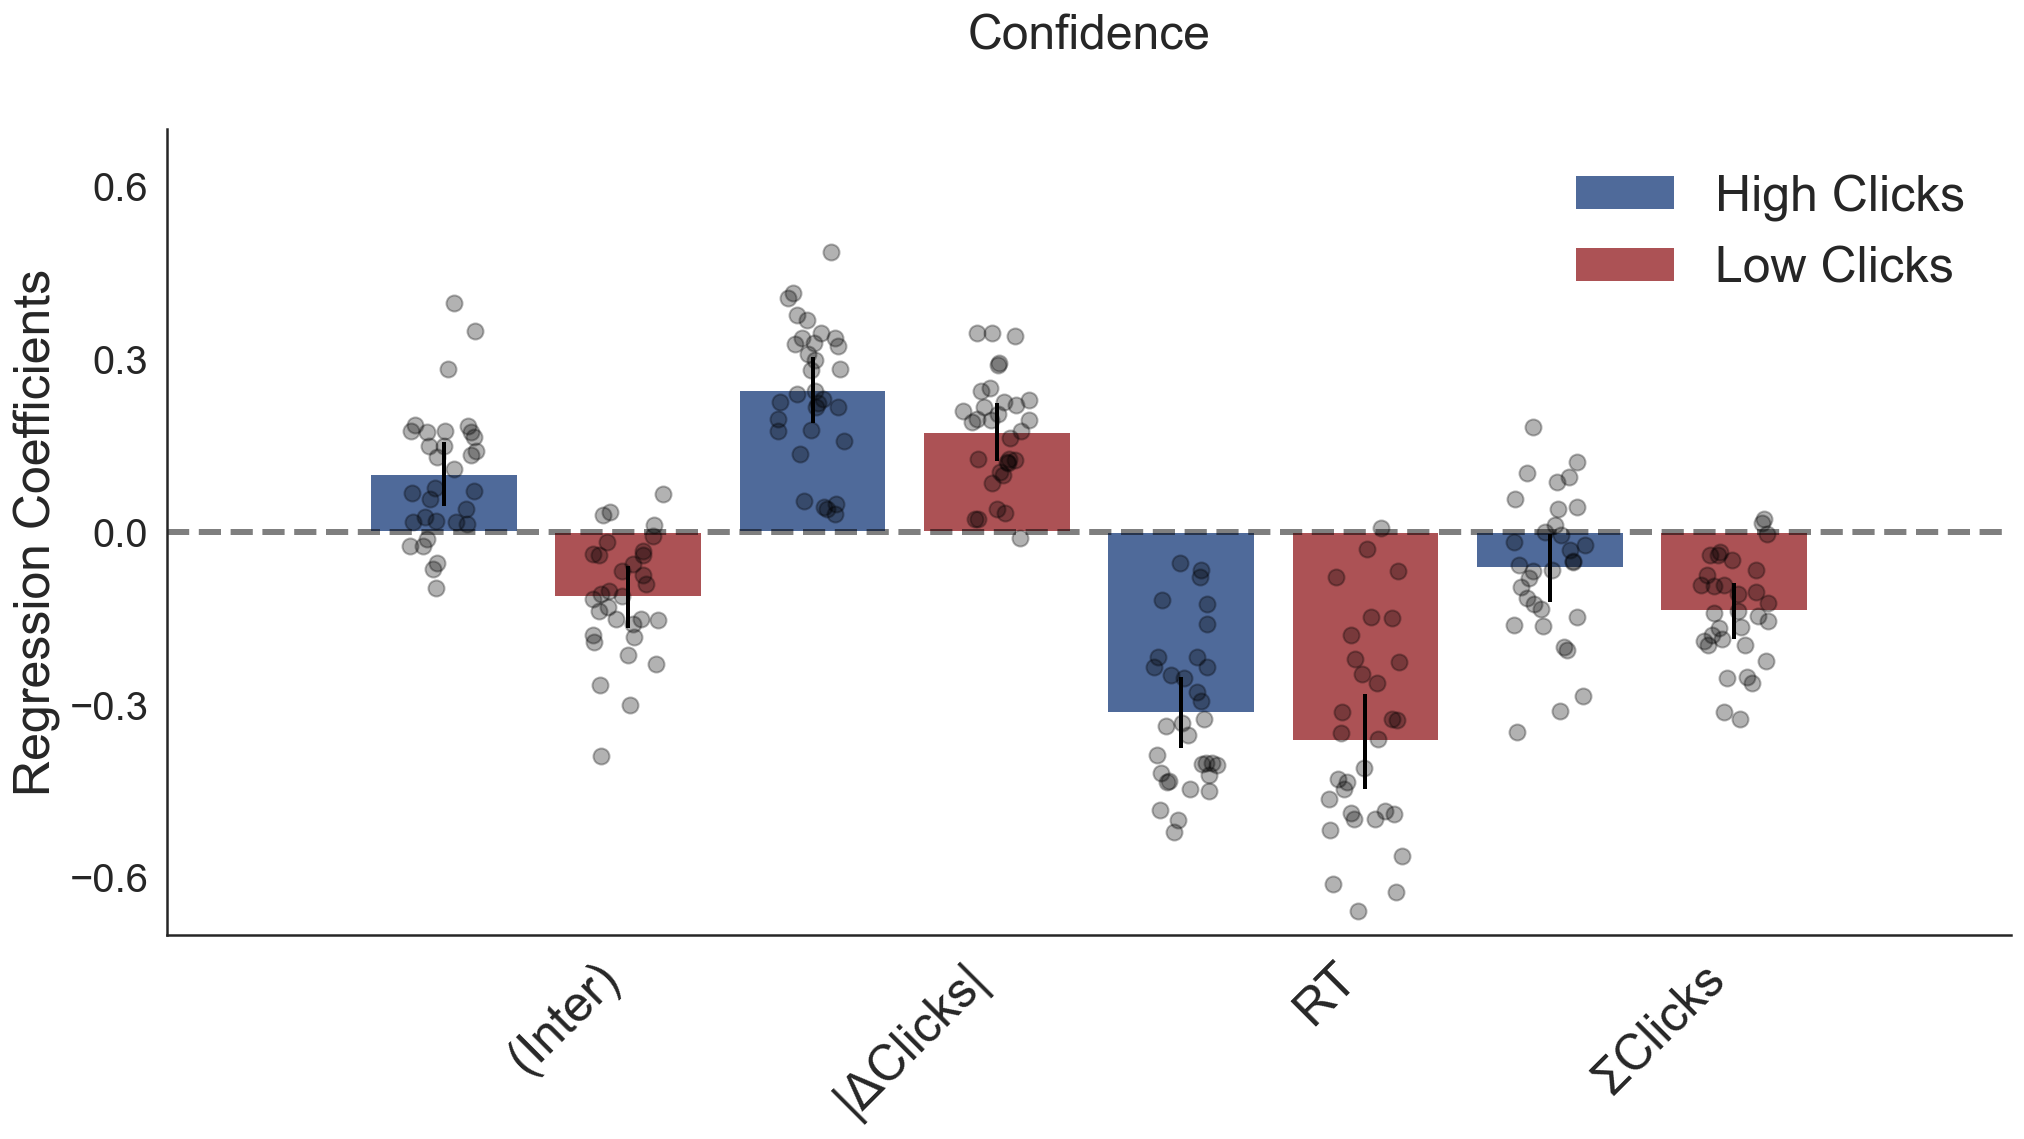

In [79]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Confidence', size='big',ymultiple=0.3, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
#plt.ylim(-0.4, 0.4)
plt.xticks([1.25,2.25,3.25, 4.25],['(Inter)','|ΔClicks|','RT','ΣClicks'], rotation=45)

In [80]:
del table_data2['(Intercept)']
del table_data1['(Intercept)']
del par_table_data1['(Intercept)']
del par_table_data2['(Intercept)']

([<matplotlib.axis.XTick at 0x7fa9d8868f60>,
 [Text(1.25, 0, '|ΔClicks|'), Text(2.25, 0, 'RT'), Text(3.25, 0, 'ΣClicks')])

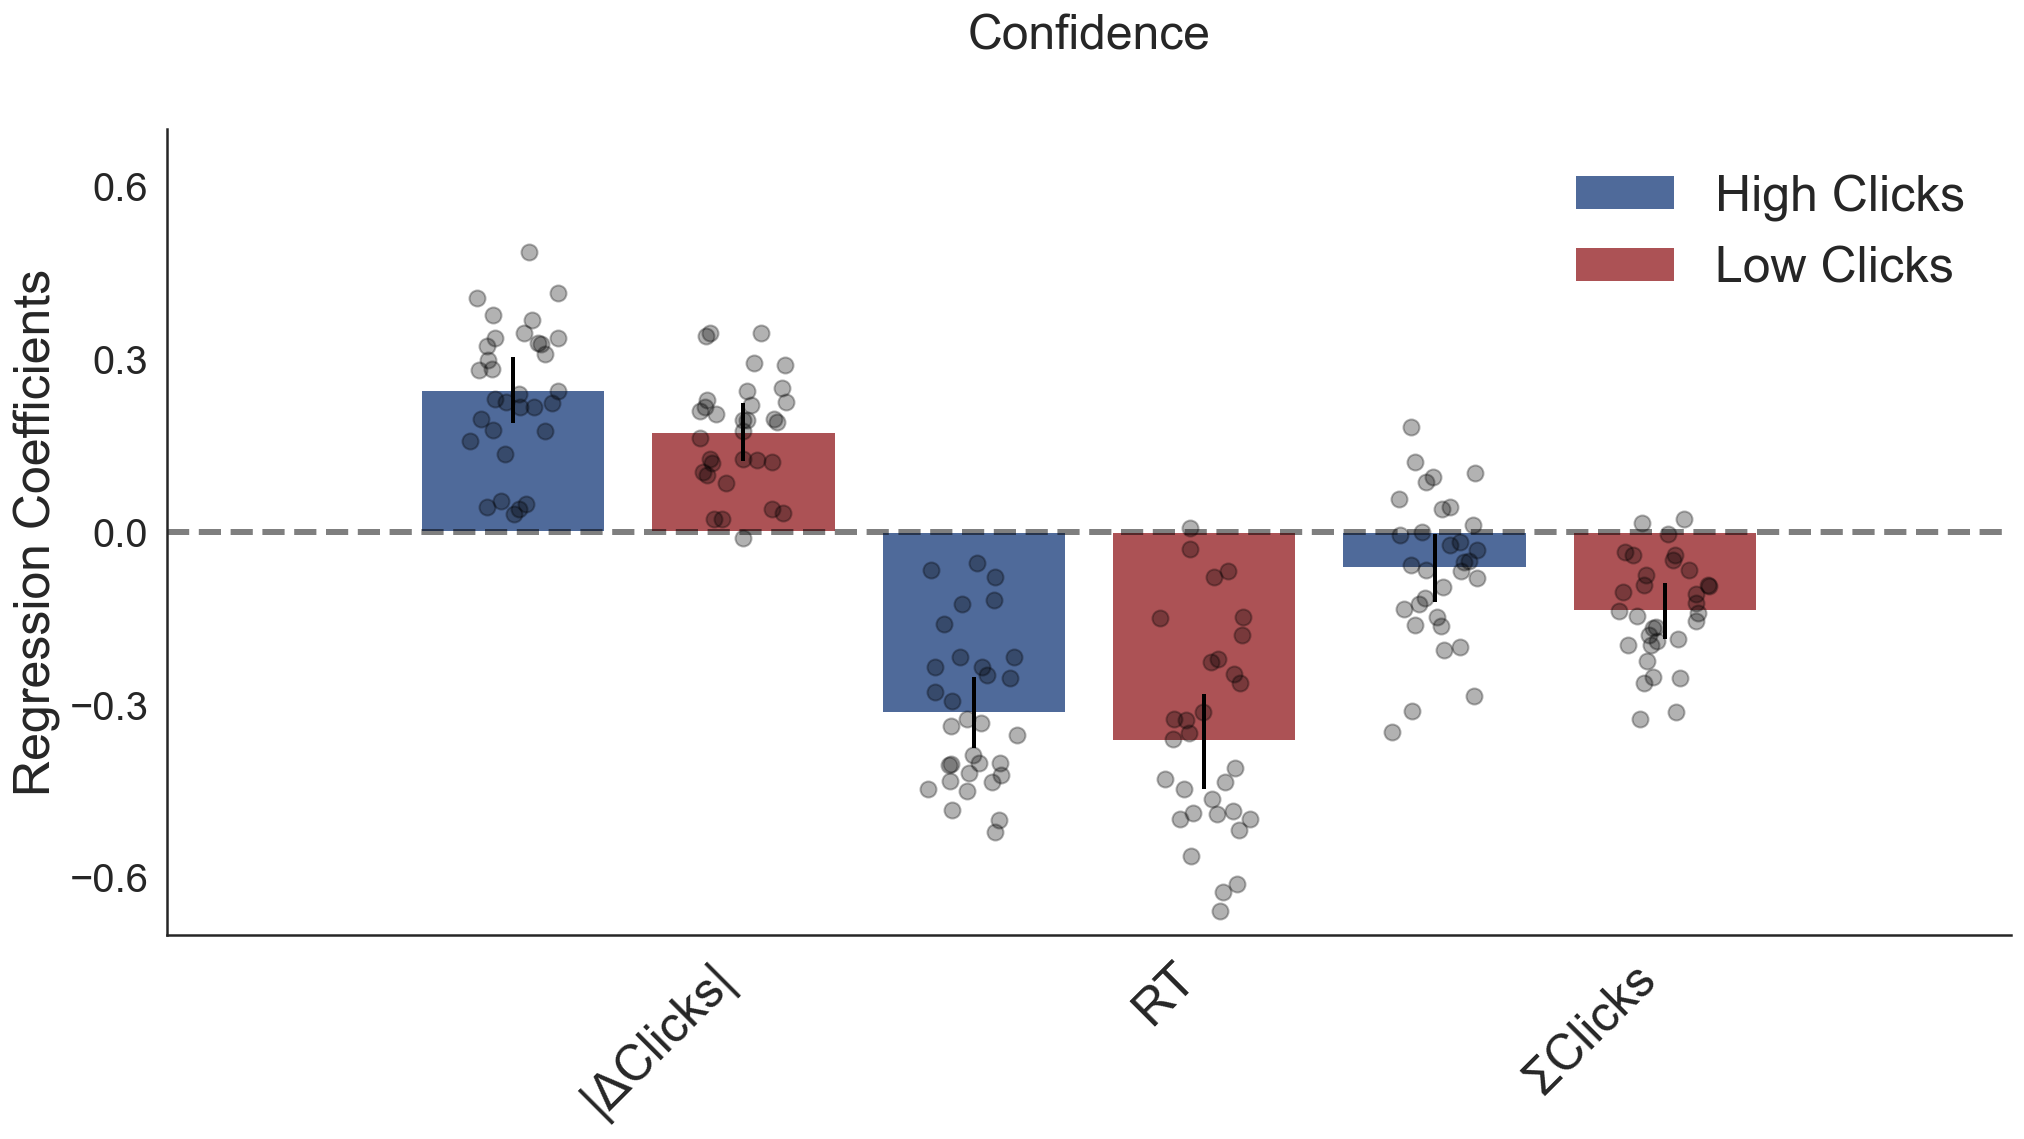

In [81]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Confidence', size='big',ymultiple=0.3, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
#plt.ylim(-0.4, 0.4)
plt.xticks([1.25,2.25,3.25],['|ΔClicks|','RT','ΣClicks'], rotation=45)

In [82]:
stats.ttest_rel(par_table_data1.zTotFreq.values,par_table_data2.zTotFreq.values)

Ttest_relResult(statistic=4.354955838718932, pvalue=0.00013500857424486265)

In [83]:
stats.ttest_rel(par_table_data1.zRT.values,par_table_data2.zRT.values)

Ttest_relResult(statistic=1.3923090011849097, pvalue=0.17373674654948795)

In [84]:
stats.ttest_rel(par_table_data1.zAbsDFreq.values,par_table_data2.zAbsDFreq.values)

Ttest_relResult(statistic=4.061807746515319, pvalue=0.0003075478004247497)

In [85]:
print(np.mean(par_table_data1.zTotFreq.values))
print(np.mean(par_table_data2.zTotFreq.values))

-0.06243737802234621
-0.13646634632193552


## Confidence - chosen unchosen clicks predictor

In [86]:
regFormula1 = "zConf ~    zAbsDFreq + zRT + zChoFreq + zUnchoFreq + (zAbsDFreq + zRT + zChoFreq + zUnchoFreq|part) "

model1 = Lmer(regFormula1, data=data_expHigh)
model2 = Lmer(regFormula1, data=data_expLow)

model1.fit()
model2.fit()

table_data1 = model1.coefs.T
table_data2 = model2.coefs.T

par_table_data1 = model1.fixef
par_table_data2 = model2.fixef

Model failed to converge with max|grad| = 0.020965 (tol = 0.002, component 1) 

Formula: zConf~zAbsDFreq+zRT+zChoFreq+zUnchoFreq+(zAbsDFreq+zRT+zChoFreq+zUnchoFreq|part)

Family: gaussian	 Inference: parametric

Number of observations: 2880	 Groups: {'part': 32.0}

Log-likelihood: -3594.441 	 AIC: 7188.882

Random effects:

                 Name    Var    Std
part      (Intercept)  0.040  0.199
part        zAbsDFreq  0.010  0.099
part              zRT  0.021  0.143
part         zChoFreq  0.016  0.128
part       zUnchoFreq  0.043  0.206
Residual               0.667  0.817

              IV1         IV2   Corr
part  (Intercept)   zAbsDFreq -0.344
part  (Intercept)         zRT  0.313
part  (Intercept)    zChoFreq -0.122
part  (Intercept)  zUnchoFreq  0.868
part    zAbsDFreq         zRT -0.580
part    zAbsDFreq    zChoFreq -0.407
part    zAbsDFreq  zUnchoFreq -0.035
part          zRT    zChoFreq  0.328
part          zRT  zUnchoFreq  0.089
part     zChoFreq  zUnchoFreq -0.282

Fixed effects

In [87]:
table_data1

(Intercept)   zAbsDFreq          zRT     zChoFreq   zUnchoFreq
Estimate   -0.0858473   0.0970191    -0.291965      0.14907    -0.223299
2.5_ci      -0.170814   0.0412898    -0.351177    0.0837175    -0.307445
97.5_ci  -0.000880679    0.152748    -0.232752     0.214422    -0.139153
SE          0.0433511   0.0284338     0.030211    0.0333436    0.0429324
DF            24.9191     27.0596      32.4136      28.8018        25.21
T-stat       -1.98028      3.4121     -9.66417      4.47072     -5.20117
P-val       0.0588153  0.00204203  4.55033e-11  0.000111524  2.16307e-05
Sig                 .          **          ***          ***          ***

In [88]:
table_data2

(Intercept)    zAbsDFreq          zRT     zChoFreq zUnchoFreq
Estimate   -0.234924    0.0783154    -0.340375    -0.219592  0.0270437
2.5_ci     -0.303358    0.0341515    -0.418132    -0.292909 -0.0205018
97.5_ci    -0.166491     0.122479    -0.262618    -0.146274  0.0745891
SE         0.0349157     0.022533    0.0396726    0.0374076  0.0242583
DF           25.8883      212.728       25.674      30.8458    56.6714
T-stat      -6.72832      3.47559      -8.5796     -5.87025    1.11482
P-val     3.9518e-07  0.000617746  5.15668e-09  1.80882e-06   0.269633
Sig              ***          ***          ***          ***

([<matplotlib.axis.XTick at 0x7fa9e8eb5cf8>,
 [Text(1.25, 0, '(Inter)'),
  Text(2.25, 0, '|ΔClicks|'),
  Text(3.25, 0, 'RT'),
  Text(4.25, 0, 'ChoClicks'),
  Text(5.25, 0, 'UnchoClicks')])

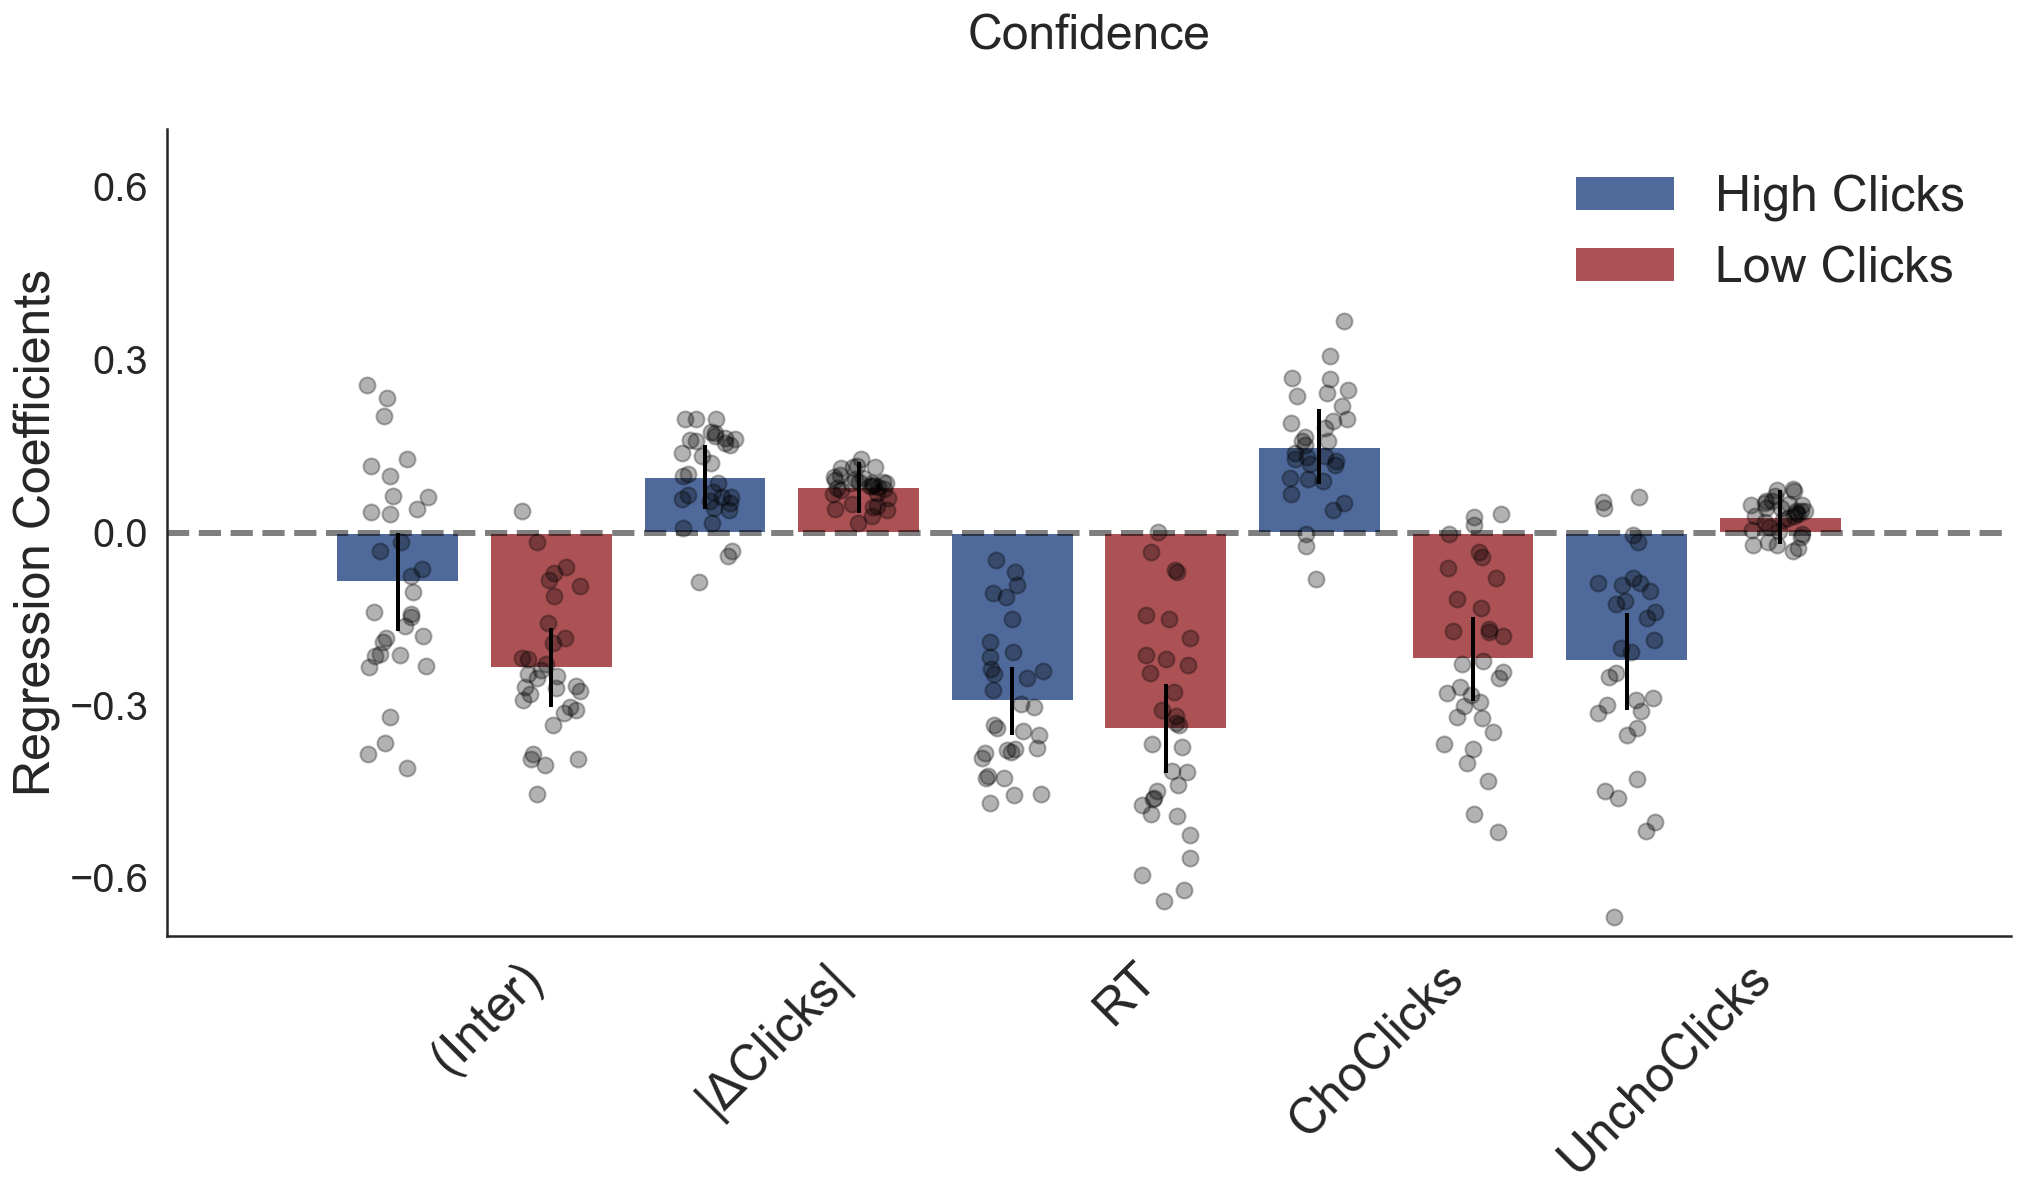

In [89]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Confidence', size='big',ymultiple=0.3, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
#plt.ylim(-0.4, 0.4)
plt.xticks([1.25,2.25,3.25, 4.25,5.25],['(Inter)','|ΔClicks|','RT','ChoClicks', 'UnchoClicks'], rotation=45)

In [90]:
del table_data2['(Intercept)']
del table_data1['(Intercept)']
del par_table_data1['(Intercept)']
del par_table_data2['(Intercept)']

([<matplotlib.axis.XTick at 0x7fa99b02ce10>,
 [Text(1.25, 0, '|ΔClicks|'),
  Text(2.25, 0, 'RT'),
  Text(3.25, 0, 'ChoClicks'),
  Text(4.25, 0, 'UnchoClicks')])

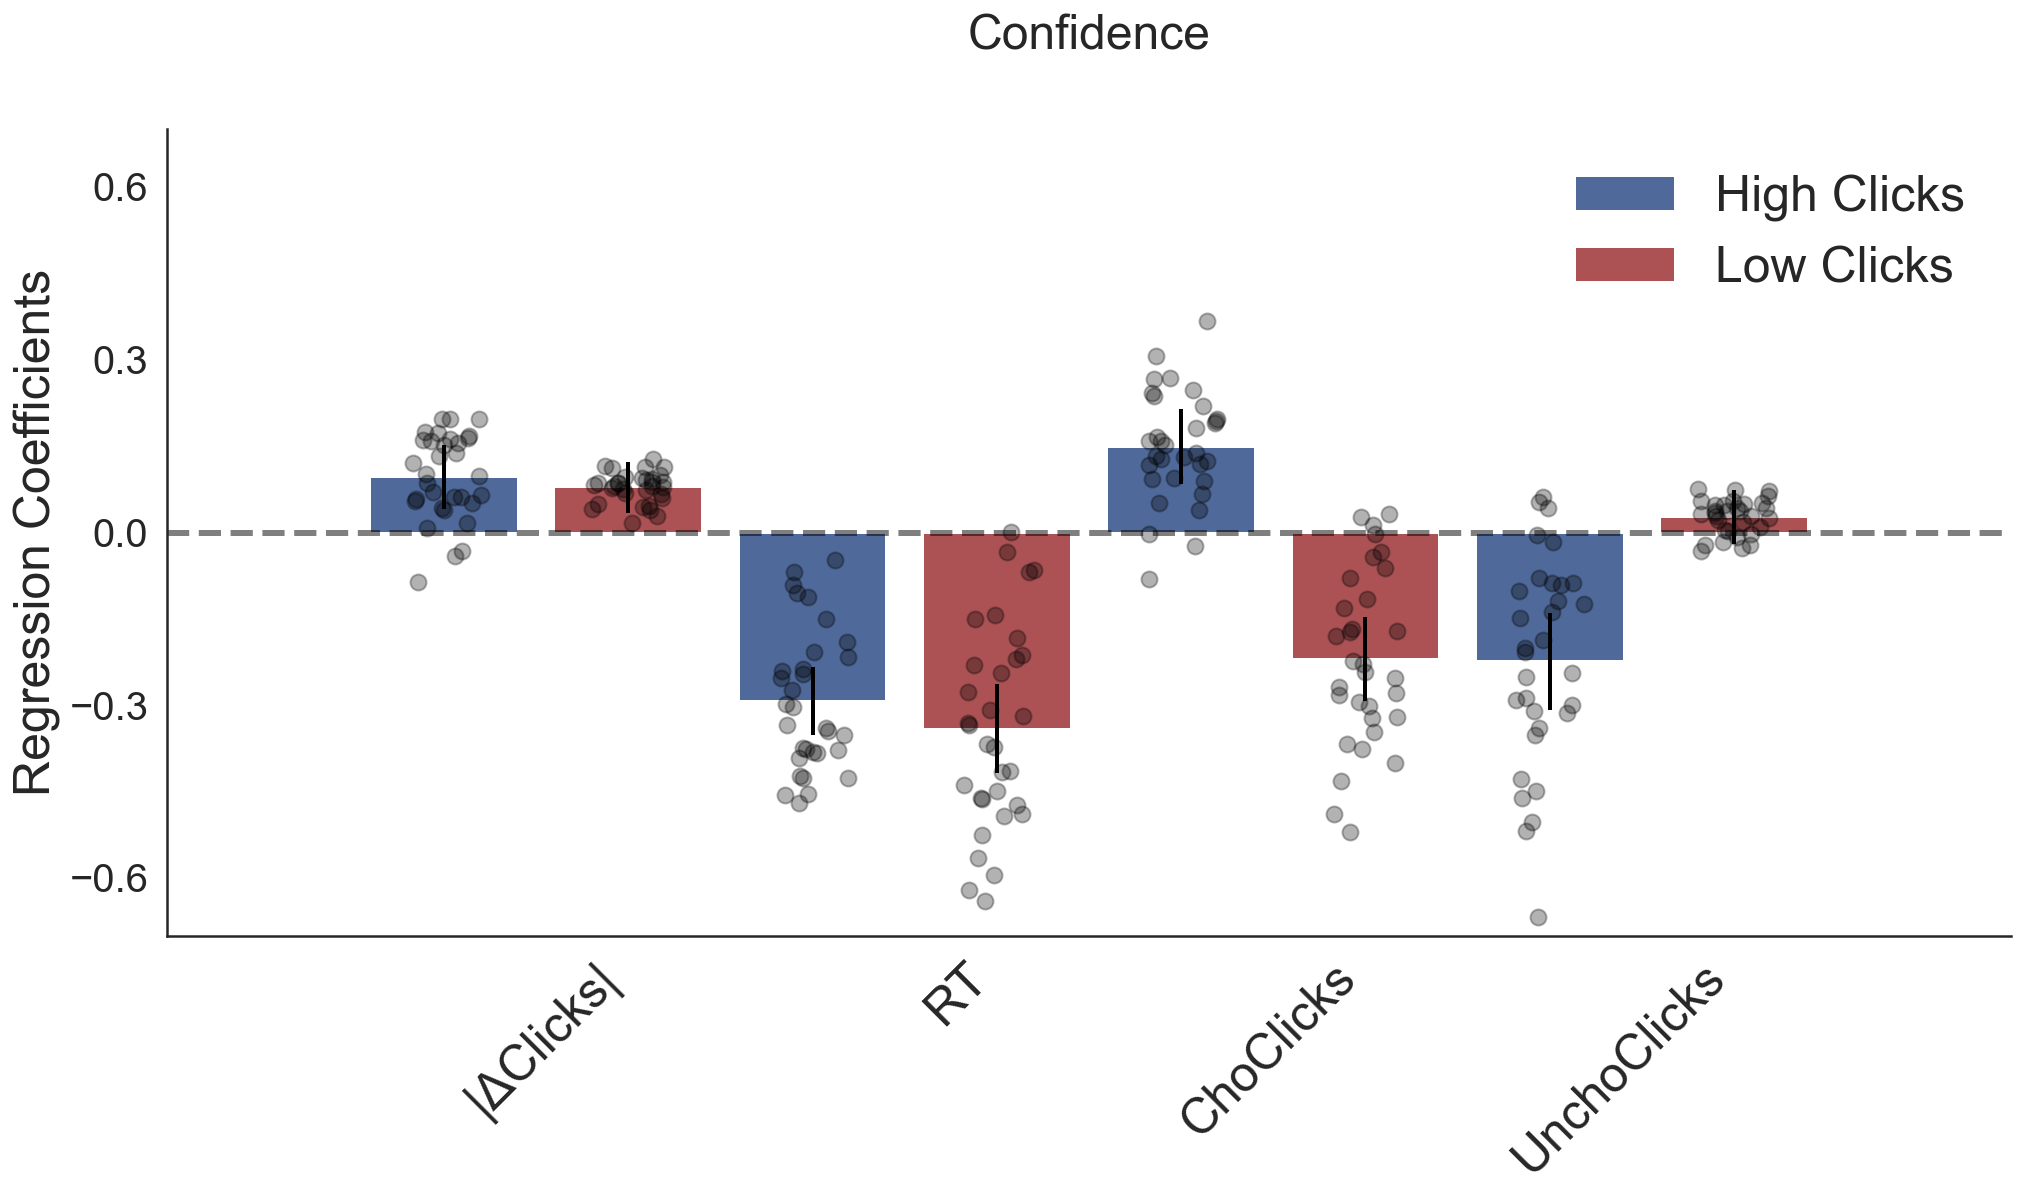

In [91]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Confidence', size='big',ymultiple=0.3, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
#plt.ylim(-0.4, 0.4)
plt.xticks([1.25,2.25,3.25, 4.25],['|ΔClicks|','RT','ChoClicks', 'UnchoClicks'], rotation=45)

In [92]:
stats.ttest_rel(par_table_data1.zChoFreq.values,par_table_data2.zChoFreq.values)

Ttest_relResult(statistic=11.116334415494958, pvalue=2.4135554022305416e-12)

In [93]:
stats.ttest_rel(par_table_data1.zRT.values,par_table_data2.zRT.values)

Ttest_relResult(statistic=1.463953887425812, pvalue=0.15327411680465897)

In [94]:
stats.ttest_rel(par_table_data1.zAbsDFreq.values,par_table_data2.zAbsDFreq.values)

Ttest_relResult(statistic=1.1964642198384146, pvalue=0.24058629044630453)

In [95]:
print(np.mean(par_table_data1.zChoFreq.values))
print(np.mean(par_table_data2.zChoFreq.values))

0.1490697705945677
-0.2195918831460743


## -- [end ] 

In [4]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


In [6]:
%%R
library(lme4)
#library(car)
library(optimx)
library(ggplot2)
library(MASS)
#library(broom)

#library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)

R[write to console]: Loading required package: Matrix

R[write to console]: Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

R[write to console]: 
arm (Version 1.10-1, built: 2018-4-12)


R[write to console]: Working directory is /Users/pradyumna/Documents/GiTs/pupilPEB2021/PupilPitch_FullParticipants


R[write to console]: Loading required package: mvtnorm

R[write to console]: Loading required package: survival

R[write to console]: Loading required package: TH.data

R[write to console]: 
Attaching package: ‘TH.data’


R[write to console]: The following object is masked from ‘package:MASS’:

    geyser




In [7]:
%%R
# Use in case the libraries are not available in the system
#install.packages('lme4')
#install.packages("car")
#install.packages("ggplot2")
#install.packages("broom")
#install.packages("arm")
#install.packages("ggplot2")
#install.packages("optimx")
#install.packages("multcomp")

NULL


<a id='LoadFunc'></a>
# 2. Defining Functions

#### Taken from Folke et al. (2016)

### Plot distributions

In [8]:
def participant_densities(data, var, xlim=(0,100), rug=True, title = ''):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(10,10))

    for x in participants:
        # defining the sub figures
     #       sub={}
     #       sub['%s' % x] = plt.subplot(len(participants)/2, 4, order)
     #       sns.kdeplot(data.loc[data['part'] == x, var].values, ax = sub['%s' % x], shade=True)
     #       #if rug==True:
     #       #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
     #       sub['%s' % x].set_title('participant %s' % x)
     #       #sub['%s' % x].set_xlim(xlim)

            sns.kdeplot(data.loc[data['part'] == x, var].values, shade=True)

            
            order += 1
    fig.suptitle(title, fontsize = 25)


### Split variable into participantwise quantiles

In [9]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1))
    return qvalues

### Full simple logistic graph

In [10]:
def logisticplot_all (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(6,5))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)


    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high,'r--', color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low,'r--', color=modlowcol, linewidth=5, label=modlow, zorder=5)


    #Plotting the binned data
    data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords= data.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=28)
    sub.set_xlabel(xlab, fontsize=28)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    leg = sub.legend(loc=0, prop={'size':20})
    leg.get_frame().set_linewidth(0.0)

    sns.despine()
    
    return plt

### Full simple logistic graph (no bins)

In [11]:
def logisticplot_simpl (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()
    print ('Low measure coef',clf.coef_)
    
    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    print ('High measure coef',clf.coef_)



    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5) 
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20})
    leg.get_frame().set_linewidth(0.0)

    sns.despine()

### Regression Coefficients Plot

In [12]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [13]:
def Coefpresplot2(regtable,regtable2, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    

    # Set axis limits based on whether to include the intercept or not    
    
       
    
    if intercept == True:
        
        XLim = (0.75, len(regtable.columns) + 0.25)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', :].min()) < round_to_5(regtable2.loc['CImin', :].min()):
            Ymin = round_to_5(regtable.loc['CImin', :].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',:].min()-0.5)
        if round_to_5(regtable.loc['CImax', :].max()) > round_to_5(regtable2.loc['CImax', :].max()):
            Ymax = round_to_5(regtable.loc['CImax', :].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', :].max()+0.5)      

        YLim = (Ymin, Ymax)    
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()) < round_to_5(regtable2.loc['CImin', regtable.columns[1]:].min()):
            Ymin = round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',regtable.columns[1]:].min()-0.5)
        if round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()) > round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()):
            Ymax = round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()+0.5)      
        
        YLim = (Ymin, Ymax)
    
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # both regtable should have the same regressors (and in the same order)

    if intercept == True:
        Coefficients = regtable.columns
 #       Coefficients2 = regtable2.columns
    else:
        Coefficients = regtable.columns[1:]
#        Coefficients2 = regtable2.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position-0.1, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color='blue',label = 'Like')
        ax.plot(position+0.1, regtable2.loc['coefficient', Coefficient], marker='X', ms=8, color='red', label = 'Dislike')


        ax.errorbar(position-0.1, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='blue')
        ax.errorbar(position+0.1, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='red')
        
        if position == 1:
            ax.legend( prop={'size': 20})

 
    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))

    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()

    sns.despine()
    fig.savefig(str('SavedFigures/'+title +'.png'), dpi = 200 )

In [14]:
def Coefpresplot_bar(regtable, mixtable, intercept=False, barcol='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0, len(regtable.columns) + 1)
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    else:
        XLim = (0, len(regtable.columns) )
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = [barcol] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.bar(position, regtable.loc['coefficient', Coefficient], width=0.8,color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='#000000')
        
   # Plot dots for the individual coefficients
    coef_num = len(mixtable)
    for i in range(1,coef_num):
        part_coefs = mixtable[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.5,high=0.5,size=len(part_coefs))/2
        ax.plot(position_parts+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [15]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=False, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    if intercept == True:
        XLim = (0, len(regtable1.columns) + 2)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    else:
        XLim = (0, len(regtable1.columns) +1)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    if intercept == True:
        Coefficients = regtable1.columns
    else:
        if len(regtable1.columns)<len(mixtable1):
            Coefficients = regtable1.columns
        else:
            Coefficients = regtable1.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        # Plot condition 1
        ax.bar(position-0.2, regtable1.loc['coefficient', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-0.2, regtable1.loc['coefficient', Coefficient],
                    yerr=regtable1.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+0.2, regtable2.loc['coefficient', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+0.2, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        
   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    if intercept == True:
        coef_num = range(0,len(mixtable1)) 
    else:
        coef_num = range(1,len(mixtable1))
        
    for i in coef_num:
        # Plot dots condition 1
        part_coefs = mixtable1[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts-0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        # Plot dots condition 1
        part_coefs = mixtable2[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts+0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable1.columns, rotation=0)        
    else:
        if len(regtable1.columns)<len(mixtable1):
            ax.set_xticklabels(regtable1.columns, rotation=0)
        else:    
            ax.set_xticklabels(regtable1.columns[1:], rotation=0)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [16]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [17]:
def correl_plot2 (data_all,data_all2,x_variable,y_variable,color1 = '#000000',color2 = '#000000',x_varlabel = "x_variable" ,y_varlabel = "y_variable", data_label =('Correct', 'Error'), title = "Pretty PLot"):

    f = plt.figure(figsize=(5, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color1, scatter_kws={'s':70,'alpha':0.3},)
    ax = sns.regplot(data=data_all2, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color2, scatter_kws={'s':70,'alpha':0.3})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)

    # For data 1
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p1 = ax.plot(future, future_fit, color=color1, lw=3, label = data_label[0])
    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    # For data 2
    x=data_all2[x_variable]
    y=data_all2[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p2 = ax.plot(future, future_fit, color=color2, lw=3,label = data_label[1] )
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all2[x_variable], data_all2[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    ax.legend()
    ax.set_title(title)

    #plt.legend((p1, p2), data_label )
    
    plt.show()

In [18]:
def logisticplot_all_sbj_slope(moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
#inputs example   
#logisticplot_all('DDTSplit', 'High DDT', 'Low DDT', data=data_expL, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Value (DVal)',
#                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='Part')


    # Counter to know where to plot the particpant
    order = 1
    # Initialize the array to store coefs
    coefs_all = []

   # a list of all the participants in the dataset
    participants = data.loc[:, 'part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(5,5))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/5+1), 5, order)
            
            
            # Extract dataframe for that particualt participant
            data_in = data.loc[data['part'] == x]
           
            sns.set(font_scale=1.5, style='white')
           
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            #sub = plt.subplot()
            sub['%s' % x].set_title('part. %s' % x, fontsize = 50 )


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            # Paula used these dictionaries to store the values of the predictive lines for all the participants.
            logit_low = {}
            logit_high = {}
            logit_all = {}

            
            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

            # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data[moderator]==0)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data[moderator]==0)].index, yaxis])
            logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x , ' Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            low_coef = clf.coef_
            low_intercept = clf.intercept_
            
            # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data_in[moderator]==1)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data_in[moderator]==1)].index, yaxis])
            logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            high_coef = clf.coef_
            high_intercept = clf.intercept_
            
            
            # fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            all_coef = clf.coef_
            all_intercept = clf.intercept_
    
            #Plotting the predictive lines
            line_high = sub['%s' % x].plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6,linestyle='-')
            line_low = sub['%s' % x].plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5,linestyle='-')
            line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='-')
            
            coefs_part= np.column_stack((x,low_coef,low_intercept,high_coef,high_intercept,all_coef,all_intercept))
            coefs_all.append(coefs_part[0])

            
            #Plotting the binned data
            data_in['DVBin2'] = data_in.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values[0]

            # determine the x coordinates
            x_cords= data.groupby('DVBin2')[xaxis].mean()

            # determine low y coordinates
            y_cords_low = data_in.loc[(data_in[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

            # determine low y standard errors
            test = pd.DataFrame(data_in.loc[(data_in[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
            # determine high y coordinates
            y_cords_high = data_in.loc[(data_in[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

            # determine high y standard errors
            test2 = pd.DataFrame(data_in.loc[data_in[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

            # plot the low points
            plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
            # plot low error bars
            plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

            # plot the high points
            plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
            # plot high error bars
            plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
           # sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=30)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
        

            sns.despine()
            
            order += 1
    
    custom_lines = [Line2D([0], [0], color=modhighcol, lw=4),
                Line2D([0], [0], color=modlowcol, lw=4)]
    fig.legend(custom_lines, [modhigh, modlow],loc = 4,fontsize=50)       

    fig.text(0.5, -0.01, xlab, ha='center',fontsize = 70)
    fig.text(-0.01, 0.5, ylab, va='center', rotation='vertical',fontsize = 70)
    
    coefs_all = pd.DataFrame(coefs_all,columns=['Participant','Low Coef','Low Intercept','High Coef','High Intercept','All Coef','All Intercept'])
    return coefs_all

In [19]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [20]:
def splitBy(data_exp1, Splits_headers = ['ConfSplit', 'GSFMedSplit','DDTMedSplit'],Splits_variables = ['Conf', 'tGSF','tDDT']):
    
    median_matrix=[]
    median_matrix_aux=[]
    median_matrix_aux_cond=[]
    Split_cols = []
    
    for h in range(len(Splits_variables)):
        median_matrix=[]
        for i in unique(data_exp1["part"]):
            median_matrix_aux=[]
    
            for j in unique(data_exp1["frame"]):
                #median_matrix_aux_cond=[]
    
                #Extract data by participant and BlockCond (1: Like, 2: Dislike)
                Splitdata = data_exp1.loc[data_exp1['part'] == i]
                Splitdata = Splitdata.loc[Splitdata['frame'] == j]
                
                # Select the column to split
                Splitdata = Splitdata.loc[:,['TRIAL_N_LIVE',Splits_variables[h]]]
                SplitSort = Splitdata.values
                # Sort for confidence column
                SplitSort = SplitSort[np.argsort(SplitSort[:, 1])]
                #print(SplitSort)
                lenPart = len(Splitdata)
                #print(lenPart)
                # Generate column with median order
                median_low = [0] * int (lenPart/2)
    
                if len(SplitSort) != 2*len(median_low):
                    median_high=  [1] * int(len(SplitSort)-len(median_low))
                else: median_high = [1] * int (lenPart/2)
            
                median_split_order = median_low + median_high
                #Attach split median order column (1 and 0)
                median_aux= np.column_stack((SplitSort,median_split_order))
                #Sort back to trial number
                SplitSorted = median_aux[np.argsort(median_aux[:, 0])]
                #print(len(SplitSorted))
                
                for kk in range(len(SplitSorted)): 
                    if len(median_matrix_aux) == 0 :
                        median_matrix_aux = SplitSorted[0]
                    else:
                        median_matrix_aux = np.vstack([median_matrix_aux, SplitSorted[kk]])
            
            
            #print(["participant "+ str(i)+ " done"])
            # sort after adding both conditions    
            median_matrix_aux = median_matrix_aux[np.argsort(median_matrix_aux[:, 0])]
            
            #Extract only the column with the median split information
            median_matrix_aux = median_matrix_aux[:,2]
            
            #append to median matrix for the participants
            for k in range(len(median_matrix_aux)):    
                median_matrix.append(median_matrix_aux [k])
        
        median_matrix = pd.DataFrame(median_matrix,columns=[Splits_headers[h]])
        #print(len (median_matrix))
        #add new column (new split variable columns) to the split matrix
        if  h == 0:
            Split_cols = median_matrix
        else:
            Split_cols = pd.concat([Split_cols,median_matrix ],axis =1)   
    
    return Split_cols

In [21]:
# Add asterisk
def add_star(RT_like, RT_dislike):
    x1, x2 = 0, 1   
    y_max = max([np.max(RT_like), np.max(RT_dislike)])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)
    
    
# Add asterisk
def add_star1(RT_like, RT_dislike, p):
    
    if p<0.001:
        star_text = '***'
    elif p<0.01:
        star_text = '**'
    elif p<0.05:
        star_text = '*'
        
    x1, x2 = 1, 2   
    y_max = max([np.max(RT_like), np.max(RT_dislike)])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)

In [22]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value



def add_violin(all_arr):
    parts = plt.violinplot( all_arr, showmeans=False, showextrema=False, showmedians=False)
    for i, face in enumerate(parts['bodies']):
        face.set_hatch('//')
        face.set_facecolor(colr_dict[i])
        face.set_edgecolor('white')
        face.set_alpha(1)
  #  parts2 = plt.violinplot( all_arr
   #                         , showmeans=False, showextrema=False, showmedians=False)
  #  for i, face in enumerate(parts2['bodies']):
       # face.set_hatch('//')
       # face.set_facecolor('None')
   #     face.set_alpha(1)

    quartile1, medians, quartile3 = np.percentile(all_arr, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3) 
        for sorted_array, q1, q3 in zip(all_arr, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians)+1)
    plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3,alpha = 0.7)
    plt.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1,alpha = 0.7)
    plt.scatter(inds, medians, marker='o', color='white', s=2, zorder=2,alpha = 1)    

In [23]:
def logisticplot_all_part (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
 
    # a list of all the participants in the dataset
    participants = data.loc[:, parvar].unique()
    fig = figure(figsize=(20,10))
    fig.set_facecolor('white')
    
    
    # Counter to know where to plot the particpant
    order = 1

    
    for x in participants:

            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/6+1), 6, order)

            data_in = data.loc[data[parvar] == x]
            sns.set(font_scale=1.5, style='white')
            
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            sub['%s' % x].set_title('participant %s' % x)


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            logit_all = {}

            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

           #fitting the predictive logistic model for all the trials, for a participant specified by x
                    # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            all_coef = clf.coef_
            all_intercept = clf.intercept_

            #Plotting the predictive lines
            line_all = sub['%s' % x].plot(X_test, logit_all, color=modlowcol, linewidth=3, linestyle='-')
            #line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='--')

           # #Plotting the binned data
           # data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values

           # # determine the x coordinates
           # x_cords= data.groupby('DVBin2')[xaxis].mean()

           # # determine low y coordinates
           # y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

           # # determine low y standard errors
           # test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
           # # determine high y coordinates
           # y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

           # # determine high y standard errors
           # test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

           # # plot the low points
           # plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
           # # plot low error bars
           # plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

           # # plot the high points
           # plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
           # # plot high error bars
           # plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
            #sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=20)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
            order += 1


    fig.text(0.5, 0.0, xlab, fontsize= 30, ha='center')
    fig.text(0.0, 0.5, ylab,fontsize= 30, va='center', rotation='vertical')
    
    #sub.legend(loc=0, prop={'size':20})
    fig.suptitle(title, fontsize = 25)

    
    sns.despine()

In [24]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=True, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0, hatch2 ='',labels = ['',''] ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    bar_sep= 0.25
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=24)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    XLim = (0, len(regtable1.columns)+1  )
    YLim = (round_to_5(np.min([np.min(mixtable1),np.min(mixtable2)]))-0.2, round_to_5(np.max([np.max(mixtable1),np.max(mixtable2)]))+0.2)
   # else:
   #     XLim = (0, len(regtable1.columns) +1)
   #     YLim = (round_to_5(np.min([np.min(mixtable1),np.min(mixtable2)]))-0.2, round_to_5(np.max([np.max(mixtable1),np.max(mixtable2)]))+0.2)
   # if ylimits != ():
    #    YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    
    Coefficients = regtable1.columns
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        # Plot condition 1
        position += 1
        ax.bar(position-bar_sep, regtable1.loc['Estimate', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-bar_sep, regtable1.loc['Estimate', Coefficient],
                    yerr=regtable1.loc['SE', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+bar_sep, regtable2.loc['Estimate', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+bar_sep, regtable2.loc['Estimate', Coefficient],
                    yerr=regtable2.loc['SE', Coefficient]*1.96, lw=2, color='#000000')


   



   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    coef_num1 = range(0,len(mixtable1)) 
    for i in coef_num1:
        # Plot dots condition 1
        part_coefs = mixtable1.iloc[i]
        position_parts= range(len(part_coefs))
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(np.sum([list(position_parts) ,1 -  bar_sep+jittr], axis = 0), part_coefs.values, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        
    coef_num2 = range(0,len(mixtable2)) 
        
    for i in coef_num2:       
        
        # Plot dots condition 1
        part_coefs = mixtable2.iloc[i]
        position_parts= range(len(part_coefs))
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(np.sum([list(position_parts) , 1 +bar_sep-jittr], axis = 0), part_coefs.values, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, len(regtable1.columns)+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))

    # Setting the x-axis major tick's label

    ax.set_xticklabels(regtable1.columns, rotation=0)        
   
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=25)
    ax.xaxis.set_tick_params(labelsize=25)

    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    

    patch1 = mpatches.Patch(facecolor=colourlist1[position-1],hatch=r'', label=labels[0])
    patch2 = mpatches.Patch(facecolor=colourlist2[position-1],hatch=r'', label=labels[1])

    leg = plt.legend(handles=[patch1,patch2],fontsize=25)
    leg.get_frame().set_facecolor('none')
    leg.get_frame().set_linewidth(0.0)
    
    
    sns.despine()

In [25]:
#def splitBy(data_exp1, Splits_headers = ['ConfSplit', 'GSFMedSplit','DDTMedSplit'],Splits_variables = ['Conf', 'tGSF','tDDT']):
#    
#    median_matrix=[]
#    median_matrix_aux=[]
#    median_matrix_aux_cond=[]
#    Split_cols = []
#    
#    for h in range(len(Splits_variables)):
#        median_matrix=[]
#        for i in unique(data_exp1["part"]):
#            median_matrix_aux=[]
#    
#            for j in unique(data_exp1["BlockCond"]):
#                #median_matrix_aux_cond=[]
#    
#                #Extract data by participant and BlockCond (1: Like, 2: Dislike)
#                Splitdata = data_exp1.loc[data_exp1['Part'] == i]
#                Splitdata = Splitdata.loc[Splitdata['BlockCond'] == j]
#                
#                # Select the column to split
#                Splitdata = Splitdata.loc[:,['TrialN',Splits_variables[h]]]
#                SplitSort = Splitdata.values
#                # Sort for confidence column
#                SplitSort = SplitSort[np.argsort(SplitSort[:, 1])]
#                #print(SplitSort)
#                lenPart = len(Splitdata)
#                #print(lenPart)
#                # Generate column with median order
#                median_low = [0] * int (lenPart/2)
#    
#                if len(SplitSort) != 2*len(median_low):
#                    median_high=  [1] * int(len(SplitSort)-len(median_low))
#                else: median_high = [1] * int (lenPart/2)
#            
#                median_split_order = median_low + median_high
#                #Attach split median order column (1 and 0)
#                median_aux= np.column_stack((SplitSort,median_split_order))
#                #Sort back to trial number
#                SplitSorted = median_aux[np.argsort(median_aux[:, 0])]
#                #print(len(SplitSorted))
#                
#                for kk in range(len(SplitSorted)): 
#                    if len(median_matrix_aux) == 0 :
#                        median_matrix_aux = SplitSorted[0]
#                    else:
#                        median_matrix_aux = np.vstack([median_matrix_aux, SplitSorted[kk]])
#            
#            
#            #print(["participant "+ str(i)+ " done"])
#            # sort after adding both conditions    
#            median_matrix_aux = median_matrix_aux[np.argsort(median_matrix_aux[:, 0])]
#            
#            #Extract only the column with the median split information
#            median_matrix_aux = median_matrix_aux[:,2]
#            
#            #append to median matrix for the participants
#            for k in range(len(median_matrix_aux)):    
#                median_matrix.append(median_matrix_aux [k])
#        
#        median_matrix = pd.DataFrame(median_matrix,columns=[Splits_headers[h]])
#        #print(len (median_matrix))
#        #add new column (new split variable columns) to the split matrix
#        if  h == 0:
#            Split_cols = median_matrix
#        else:
#            Split_cols = pd.concat([Split_cols,median_matrix ],axis =1)   
#    
#    return Split_cols